# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

MNIST É um famoso banco de dados de imagens de dígitos manuscritos (de 0 a 9), amplamente usado para treinar e testar algoritmos de machine learning e deep learning.

In [2]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 16.06 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
!ls MNIST

processed  raw


In [4]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size()) # conjunto de 60.000 imagens, e cada imagem tem 28x28 pixels
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [10]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


* N	Number of samples (número de imagens no lote)	64 imagens no batch → N = 64
* C	Channels (número de canais da imagem)	1 para preto-e-branco (grayscale), 3 para RGB
* H	Height (altura da imagem, em pixels)	ex: 28 pixels
* W	Width (largura da imagem, em pixels)	ex: 28 pixels

### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

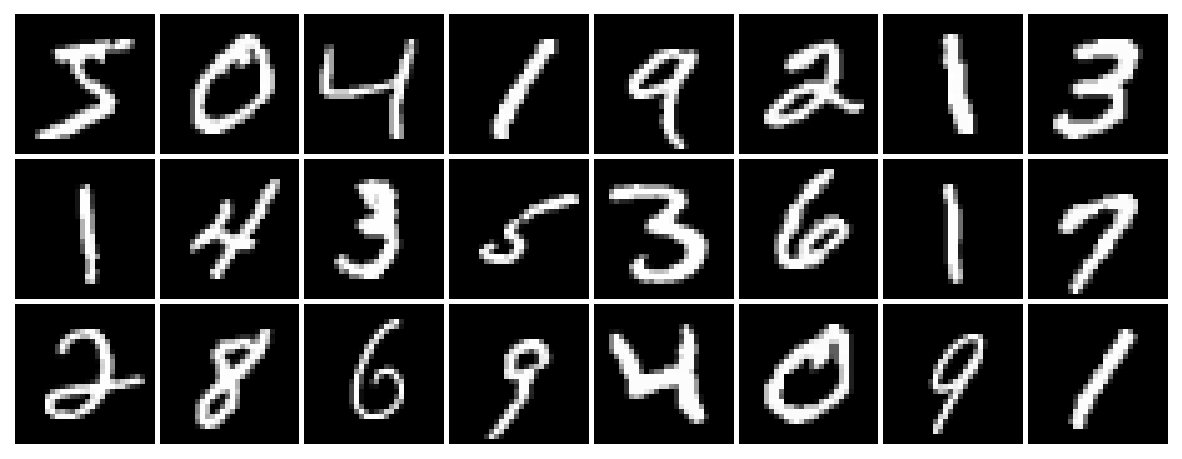

In [11]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1) # Serve para inserir o canal de cor (C), já que estamos lidando com imagens em tons de cinza (1 canal)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

In [15]:
x_train[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

class: tensor(5)


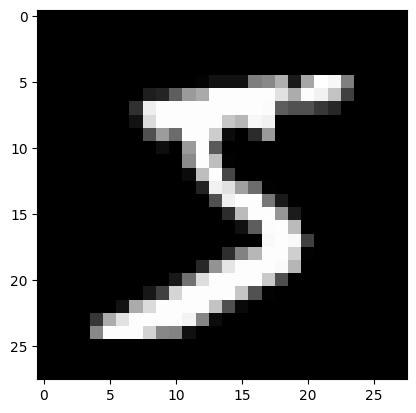

In [16]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [17]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [19]:
x_train[:5].shape # 5 imagens, cada uma com 28x28 pixels.

torch.Size([5, 28, 28])

In [21]:
x_train[:5].view(-1,28*28).shape

torch.Size([5, 784])

In [22]:
xin = x_train[:5].view(-1,28*28)  # .view() reestrutura ("reshape") o tensor para outra forma, mantendo os mesmos dados.
score = model(Variable(xin))
score

tensor([[-0.0318,  0.0238, -0.1958,  0.0591, -0.0373, -0.0176,  0.0921,  0.0254,
         -0.0009, -0.0990],
        [ 0.0475, -0.0706, -0.4024,  0.0004, -0.0659, -0.0315, -0.0320,  0.0033,
         -0.0332,  0.2457],
        [-0.0531, -0.1962, -0.1611,  0.1311,  0.1437, -0.0283, -0.2944,  0.1828,
          0.1269, -0.1003],
        [ 0.1065, -0.0539, -0.0419,  0.1030, -0.1327, -0.1402,  0.2657, -0.2932,
         -0.1567, -0.0309],
        [ 0.1000,  0.0793, -0.1933, -0.0350, -0.1742, -0.0744,  0.1154, -0.1483,
         -0.0070, -0.1375]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [23]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [26]:
for name, param in model.named_parameters():
    print(f"Nome: {name}")
    print(f"Shape: {param.shape}")
    print(f"Número de parâmetros: {param.numel()}")
    print()

Nome: weight
Shape: torch.Size([10, 784])
Número de parâmetros: 7840

Nome: bias
Shape: torch.Size([10])
Número de parâmetros: 10



### Visualização do grafo computacional da perda (loss)

In [27]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-yuob0rce
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-yuob0rce
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━

In [28]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3346, grad_fn=<NllLossBackward0>)

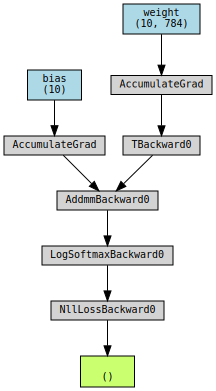

In [29]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [30]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [31]:
print('Final loss:', loss.item())

Final loss: 0.2655002176761627


### Visualizando gráfico de perda durante o treinamento

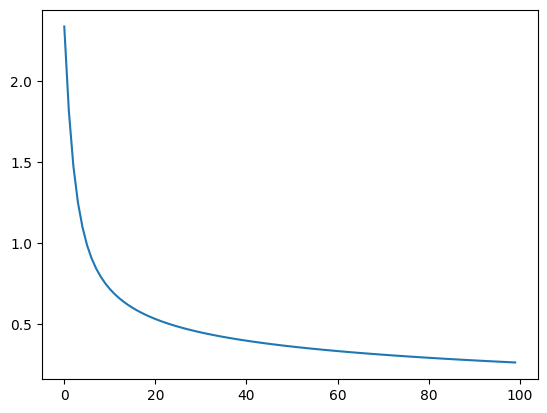

In [32]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [33]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.943


### Matriz de confusão com dados de treinamento e teste

In [34]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0   0    1   2   3    4   5   6    7   8   9
row_0                                           
0      96    0   1   0    0   0   1    0   0   2
1       0  111   1   0    0   0   1    2   1   0
2       0    0  91   1    0   1   0    1   2   1
3       0    0   0  88    0   2   0    0   0   0
4       0    0   1   0  102   2   1    2   0   3
5       0    2   0   1    0  82   0    0   2   1
6       1    0   1   1    2   2  90    0   0   0
7       0    1   1   1    0   0   0  111   0   3
8       0    2   2   0    0   1   1    0  82   0
9       0    0   1   1    1   2   0    1   0  90

## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


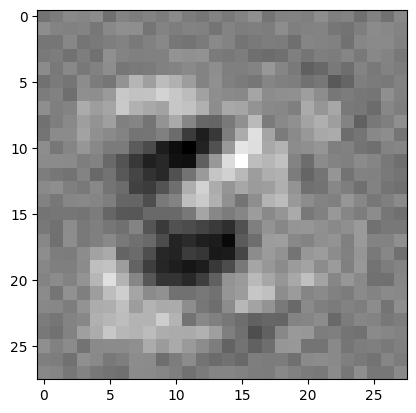

In [35]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

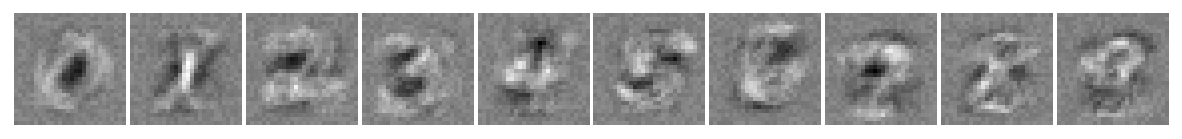

In [36]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Epoch[1/100], loss: 0.178045, acc: 0.968000


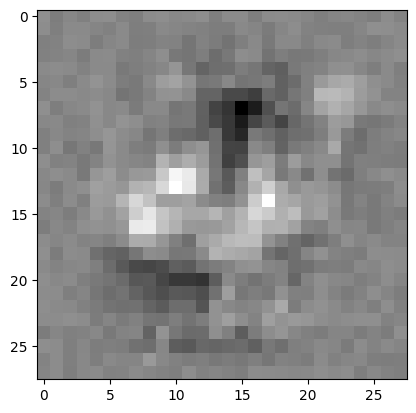

Epoch[2/100], loss: 0.177470, acc: 0.968000


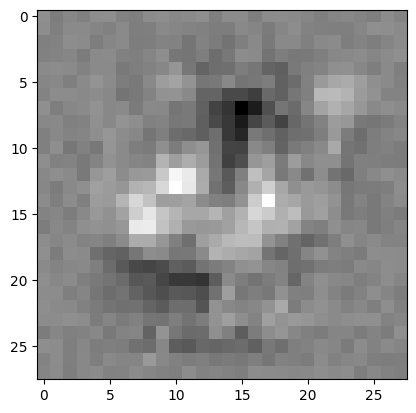

Epoch[3/100], loss: 0.176899, acc: 0.968000


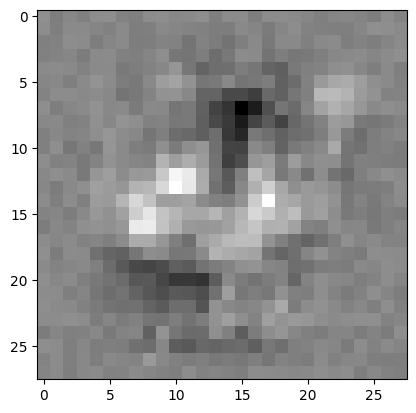

Epoch[4/100], loss: 0.176331, acc: 0.968000


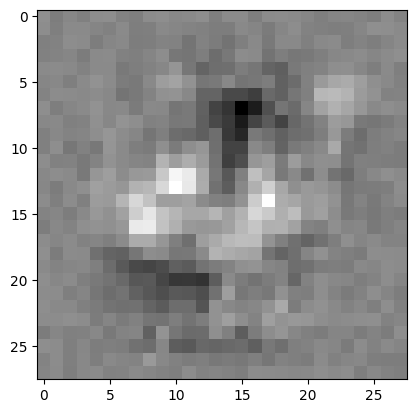

Epoch[5/100], loss: 0.175767, acc: 0.968000


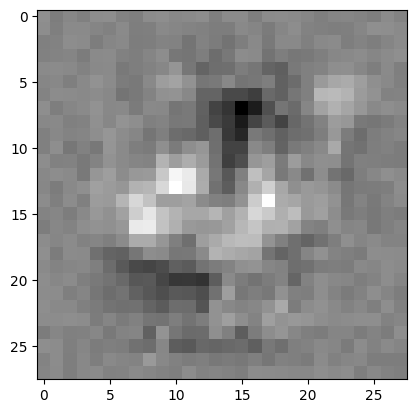

Epoch[6/100], loss: 0.175206, acc: 0.968000


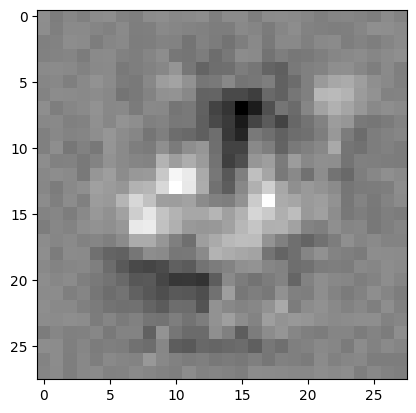

Epoch[7/100], loss: 0.174648, acc: 0.968000


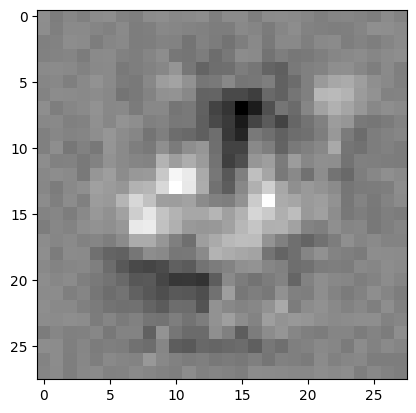

Epoch[8/100], loss: 0.174094, acc: 0.968000


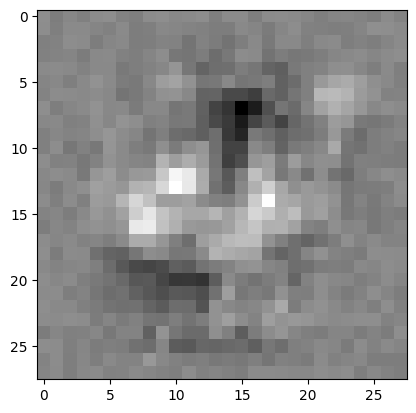

Epoch[9/100], loss: 0.173543, acc: 0.968000


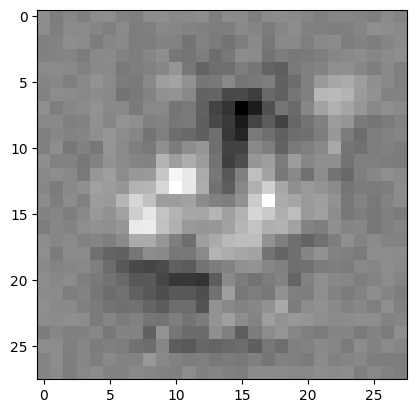

Epoch[10/100], loss: 0.172996, acc: 0.968000


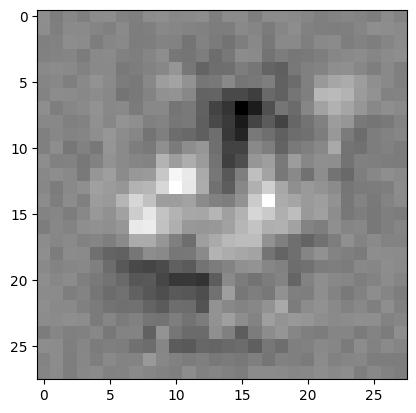

Epoch[11/100], loss: 0.172451, acc: 0.968000


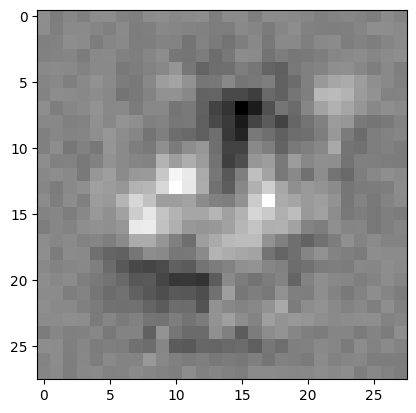

Epoch[12/100], loss: 0.171911, acc: 0.968000


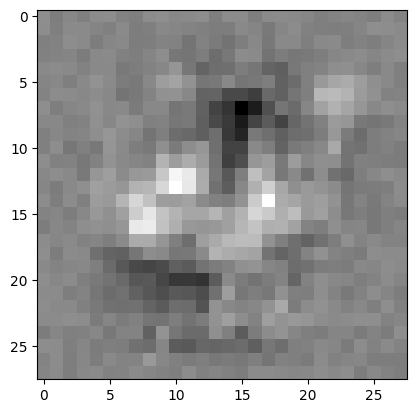

Epoch[13/100], loss: 0.171373, acc: 0.969000


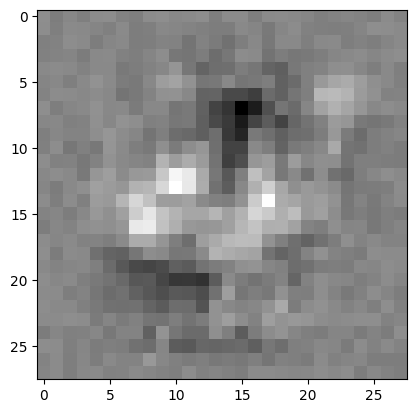

Epoch[14/100], loss: 0.170838, acc: 0.969000


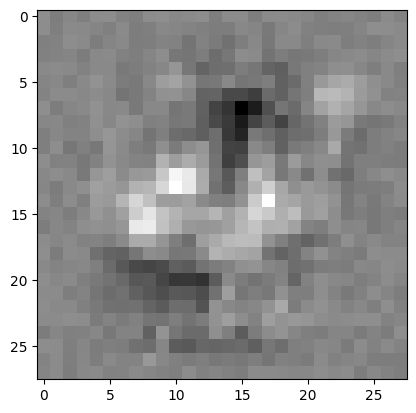

Epoch[15/100], loss: 0.170307, acc: 0.969000


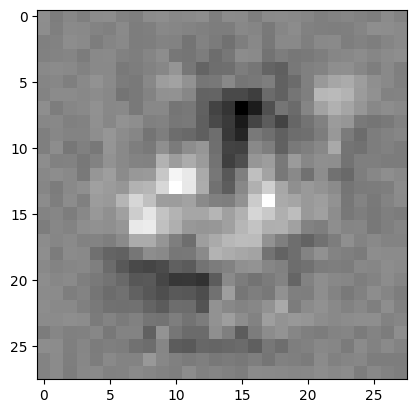

Epoch[16/100], loss: 0.169779, acc: 0.969000


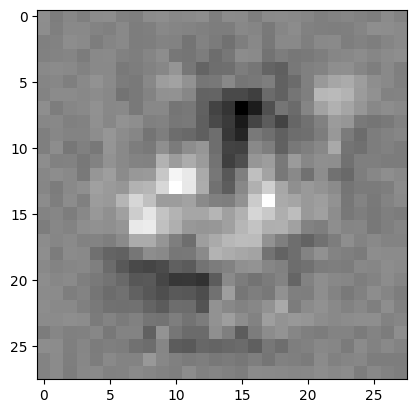

Epoch[17/100], loss: 0.169253, acc: 0.969000


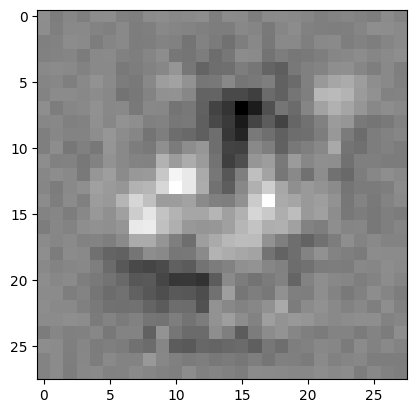

Epoch[18/100], loss: 0.168731, acc: 0.969000


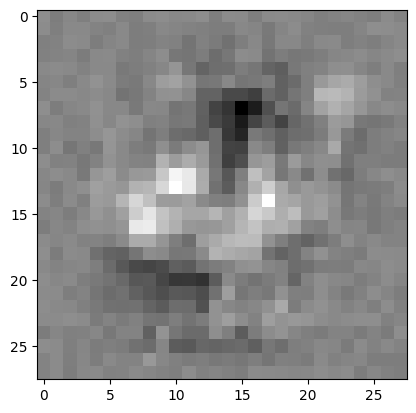

Epoch[19/100], loss: 0.168212, acc: 0.970000


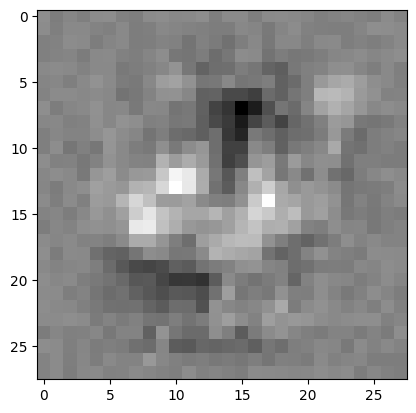

Epoch[20/100], loss: 0.167696, acc: 0.970000


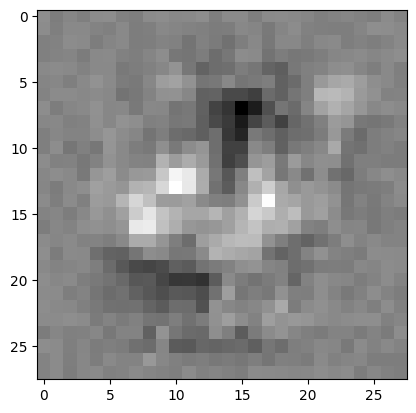

Epoch[21/100], loss: 0.167183, acc: 0.970000


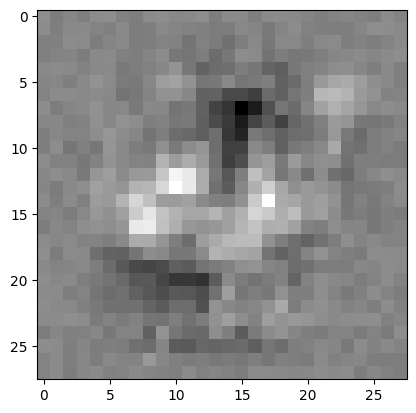

Epoch[22/100], loss: 0.166673, acc: 0.970000


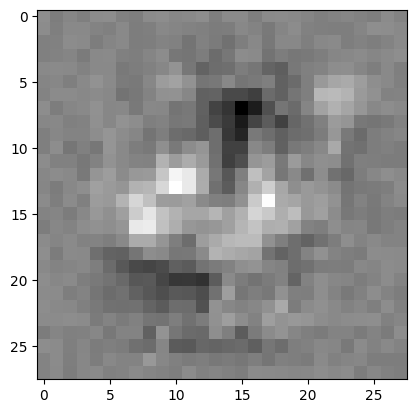

Epoch[23/100], loss: 0.166166, acc: 0.970000


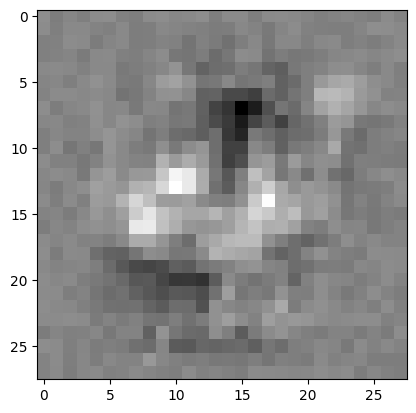

Epoch[24/100], loss: 0.165662, acc: 0.970000


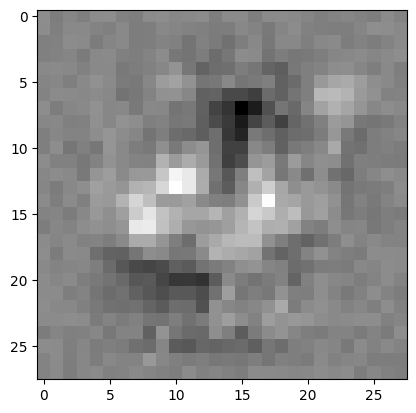

Epoch[25/100], loss: 0.165160, acc: 0.970000


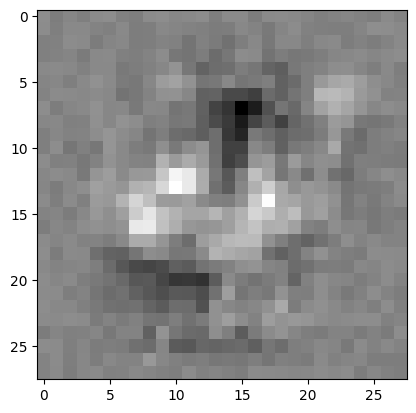

Epoch[26/100], loss: 0.164661, acc: 0.970000


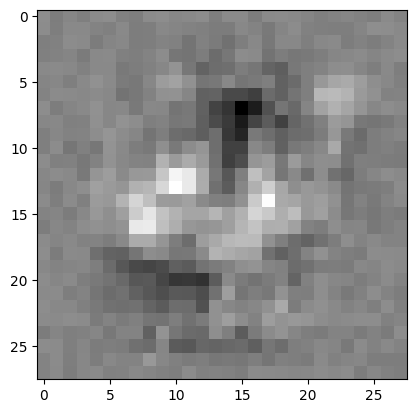

Epoch[27/100], loss: 0.164166, acc: 0.970000


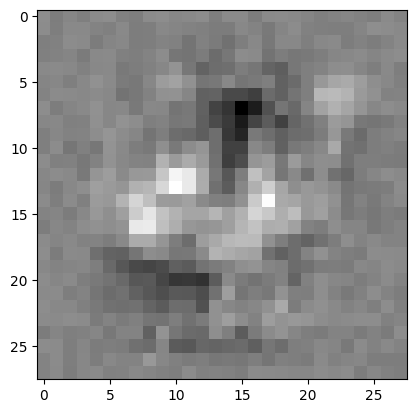

Epoch[28/100], loss: 0.163673, acc: 0.970000


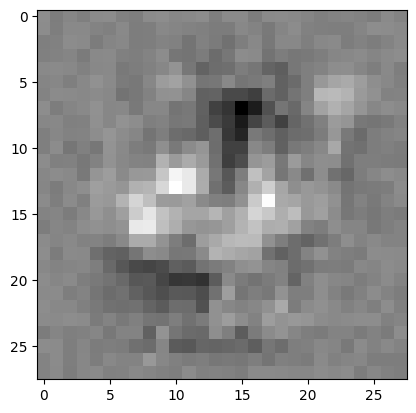

Epoch[29/100], loss: 0.163183, acc: 0.971000


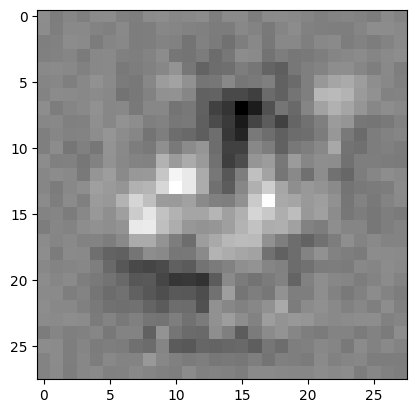

Epoch[30/100], loss: 0.162695, acc: 0.971000


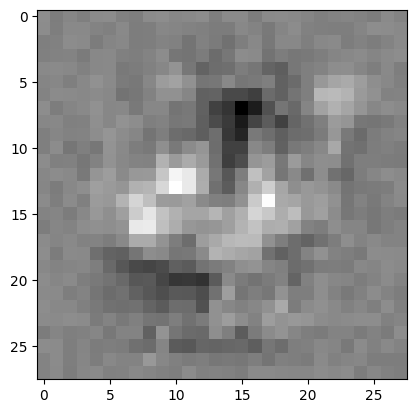

Epoch[31/100], loss: 0.162210, acc: 0.972000


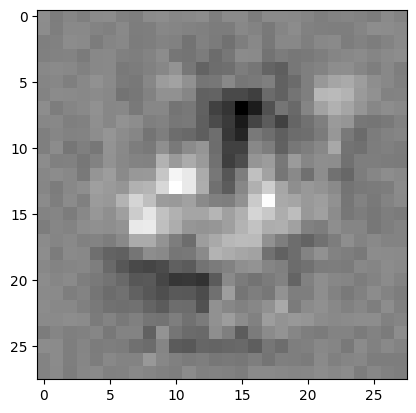

Epoch[32/100], loss: 0.161728, acc: 0.972000


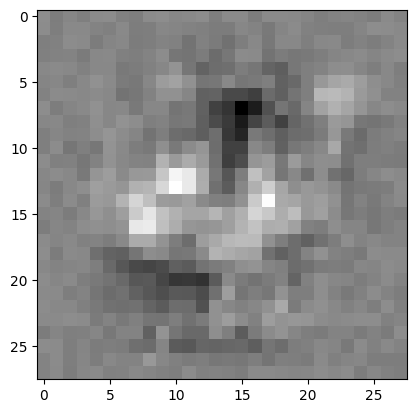

Epoch[33/100], loss: 0.161249, acc: 0.972000


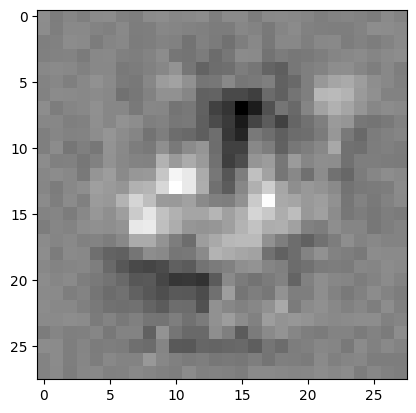

Epoch[34/100], loss: 0.160772, acc: 0.972000


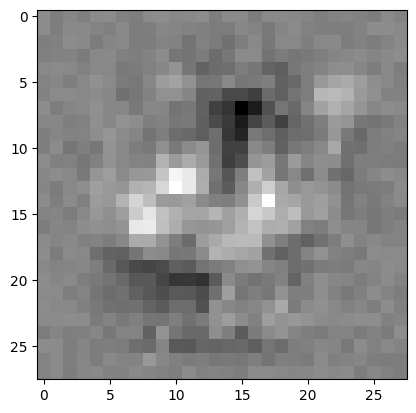

Epoch[35/100], loss: 0.160298, acc: 0.972000


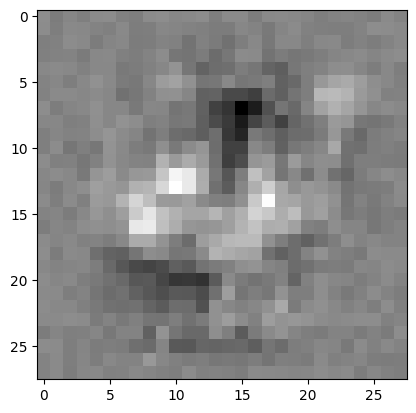

Epoch[36/100], loss: 0.159826, acc: 0.972000


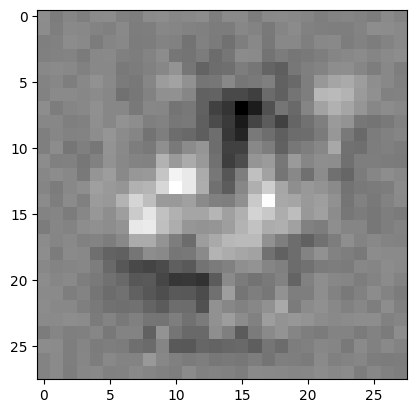

Epoch[37/100], loss: 0.159357, acc: 0.972000


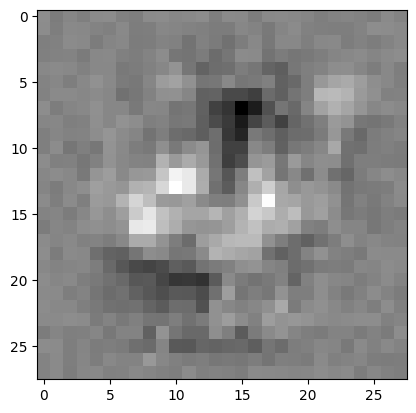

Epoch[38/100], loss: 0.158891, acc: 0.972000


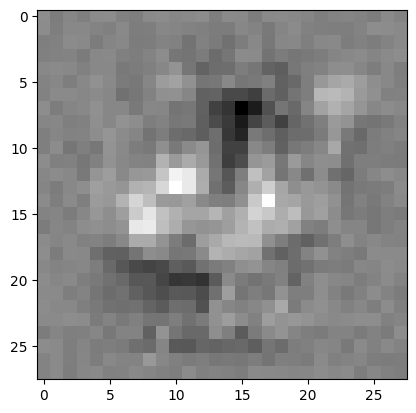

Epoch[39/100], loss: 0.158427, acc: 0.972000


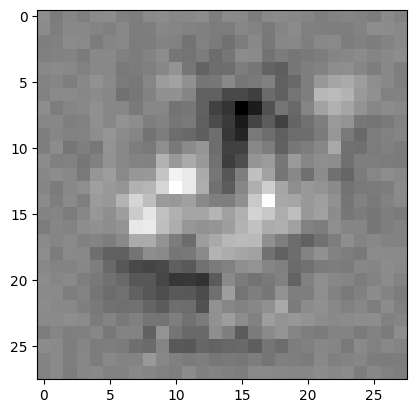

Epoch[40/100], loss: 0.157966, acc: 0.972000


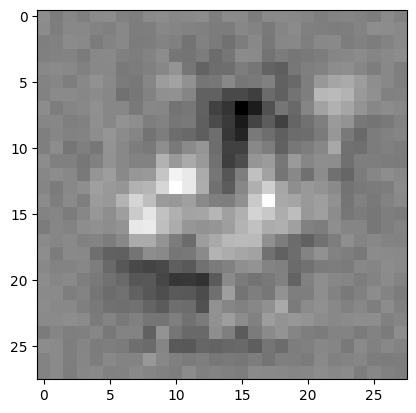

Epoch[41/100], loss: 0.157507, acc: 0.973000


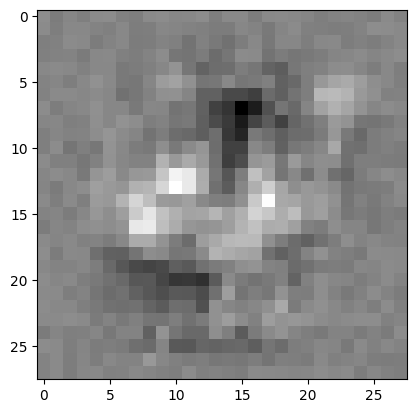

Epoch[42/100], loss: 0.157050, acc: 0.973000


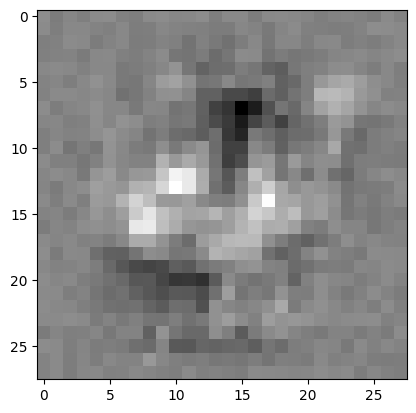

Epoch[43/100], loss: 0.156596, acc: 0.973000


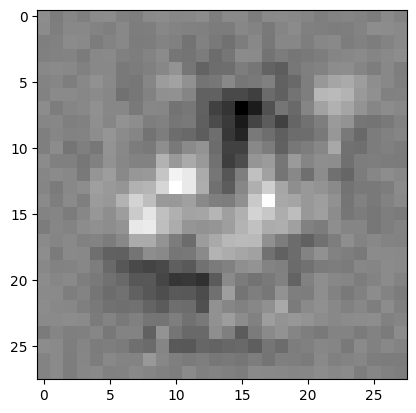

Epoch[44/100], loss: 0.156145, acc: 0.973000


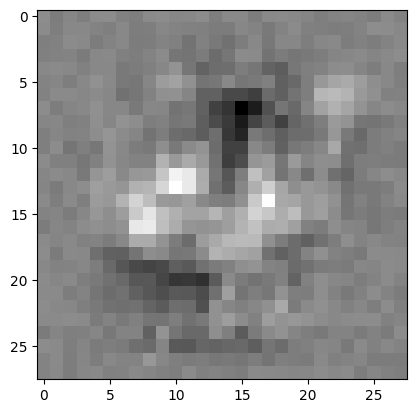

Epoch[45/100], loss: 0.155696, acc: 0.974000


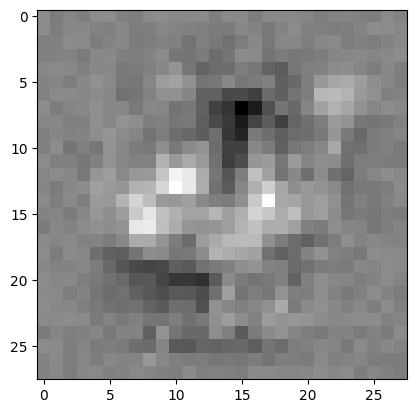

Epoch[46/100], loss: 0.155249, acc: 0.974000


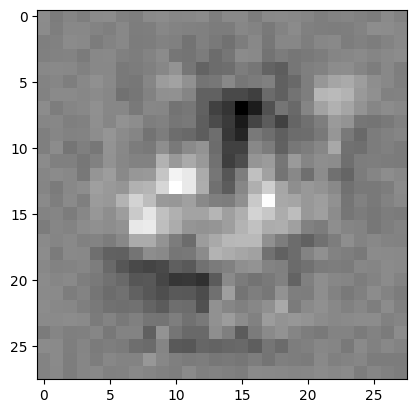

Epoch[47/100], loss: 0.154805, acc: 0.974000


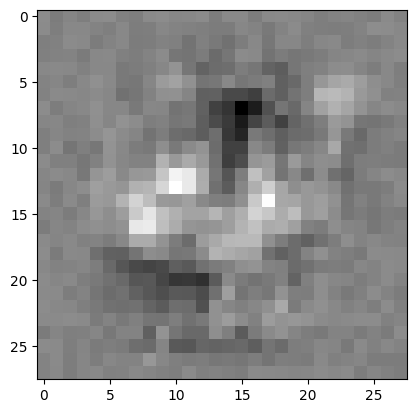

Epoch[48/100], loss: 0.154362, acc: 0.974000


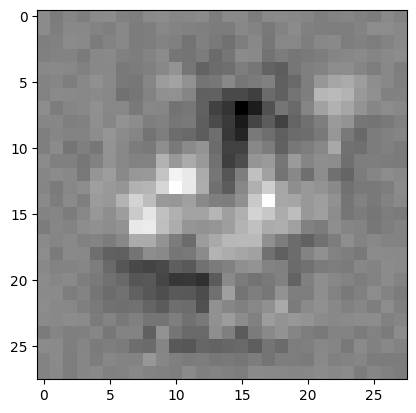

Epoch[49/100], loss: 0.153923, acc: 0.974000


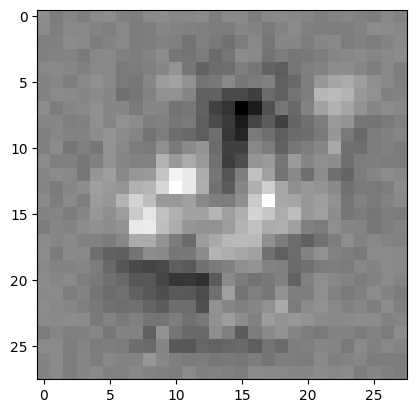

Epoch[50/100], loss: 0.153485, acc: 0.974000


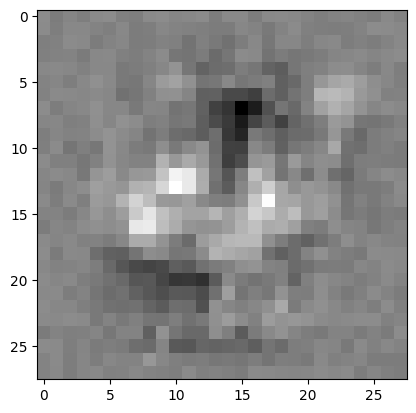

Epoch[51/100], loss: 0.153050, acc: 0.974000


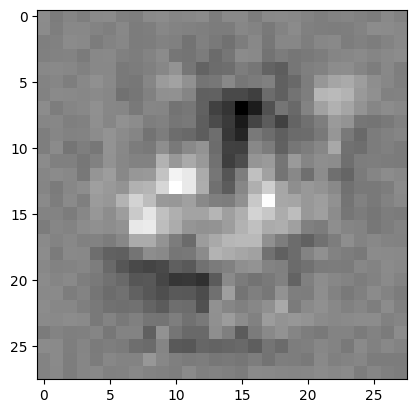

Epoch[52/100], loss: 0.152617, acc: 0.974000


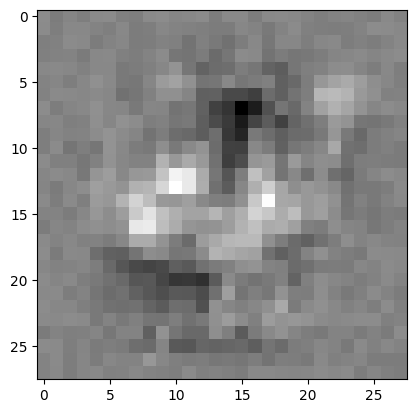

Epoch[53/100], loss: 0.152187, acc: 0.974000


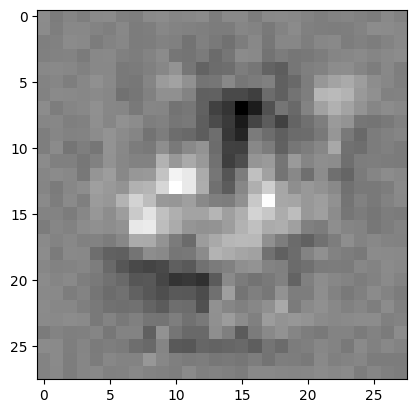

Epoch[54/100], loss: 0.151758, acc: 0.974000


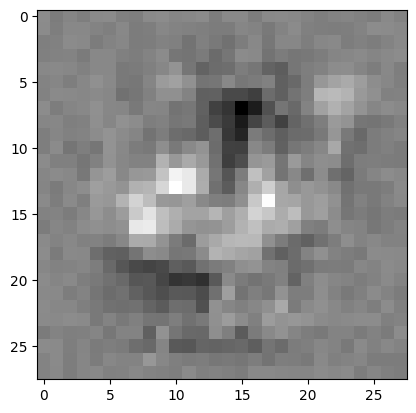

Epoch[55/100], loss: 0.151332, acc: 0.974000


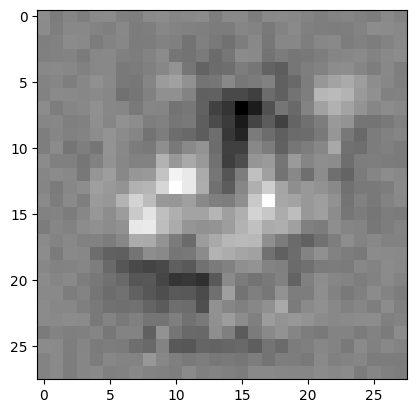

Epoch[56/100], loss: 0.150908, acc: 0.974000


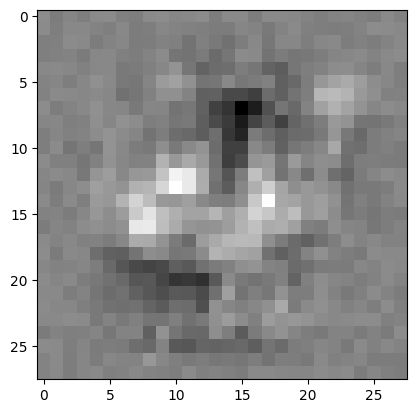

Epoch[57/100], loss: 0.150486, acc: 0.974000


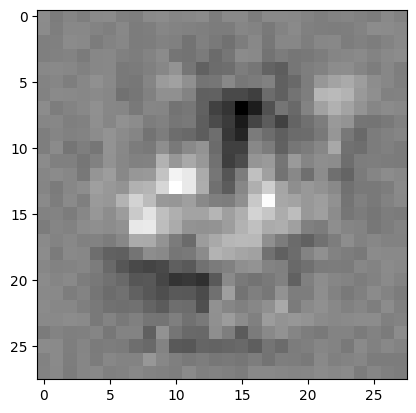

Epoch[58/100], loss: 0.150067, acc: 0.974000


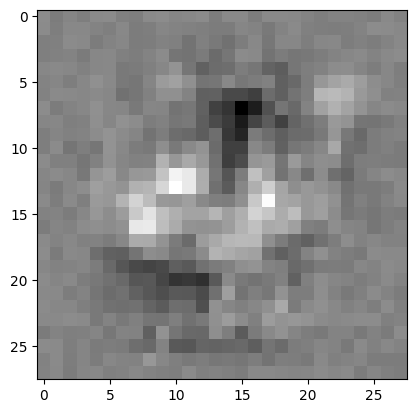

Epoch[59/100], loss: 0.149649, acc: 0.974000


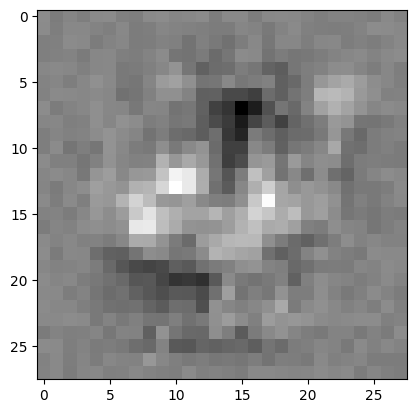

Epoch[60/100], loss: 0.149234, acc: 0.975000


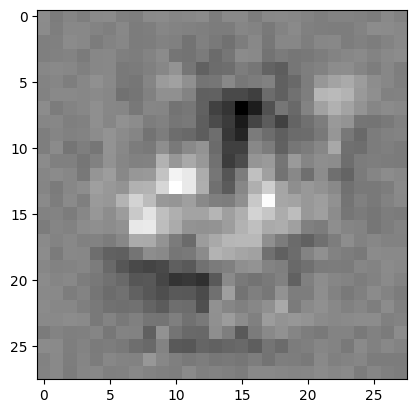

Epoch[61/100], loss: 0.148820, acc: 0.975000


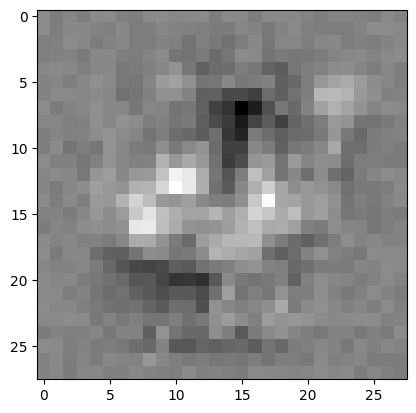

Epoch[62/100], loss: 0.148409, acc: 0.975000


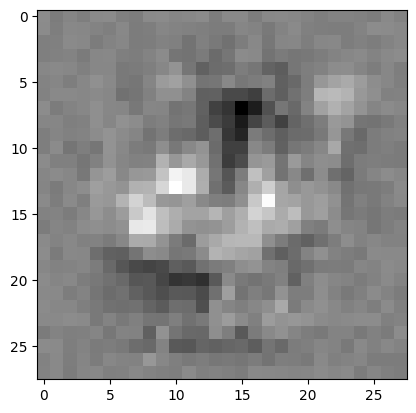

Epoch[63/100], loss: 0.148000, acc: 0.975000


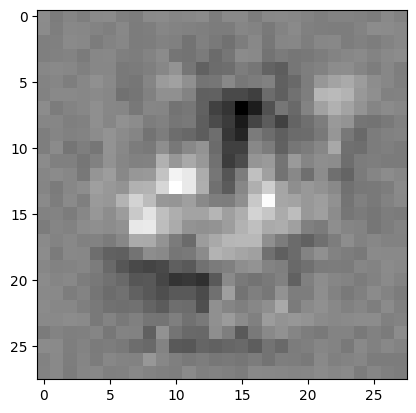

Epoch[64/100], loss: 0.147593, acc: 0.975000


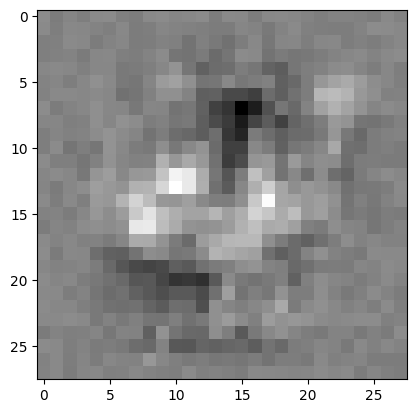

Epoch[65/100], loss: 0.147188, acc: 0.975000


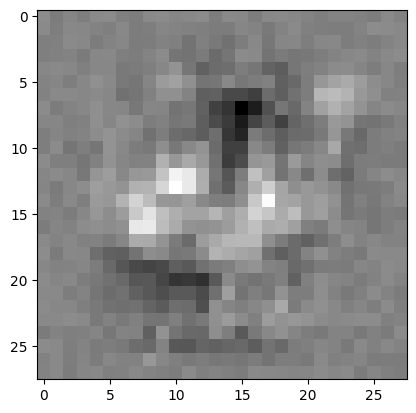

Epoch[66/100], loss: 0.146785, acc: 0.975000


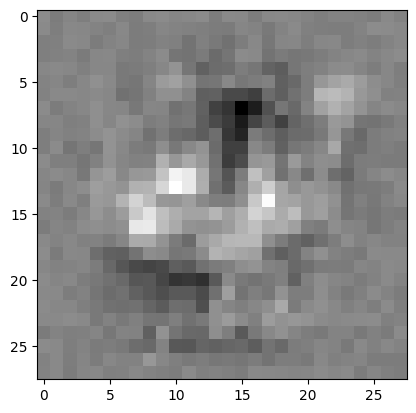

Epoch[67/100], loss: 0.146384, acc: 0.975000


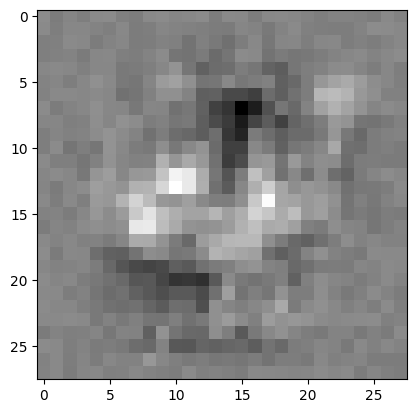

Epoch[68/100], loss: 0.145985, acc: 0.975000


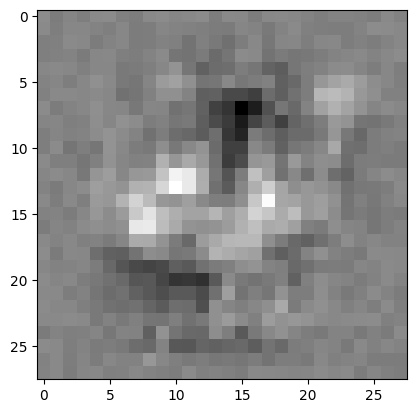

Epoch[69/100], loss: 0.145588, acc: 0.975000


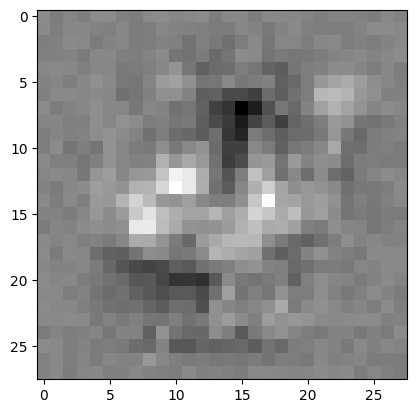

Epoch[70/100], loss: 0.145193, acc: 0.975000


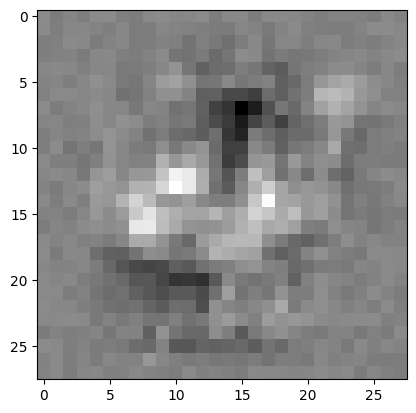

Epoch[71/100], loss: 0.144800, acc: 0.975000


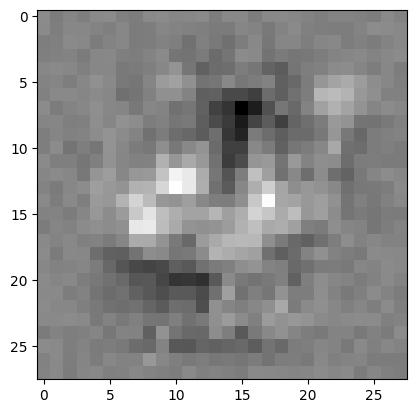

Epoch[72/100], loss: 0.144409, acc: 0.975000


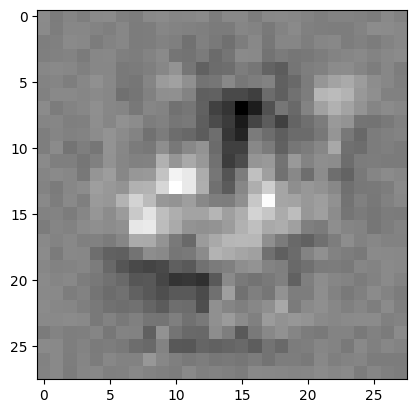

Epoch[73/100], loss: 0.144020, acc: 0.975000


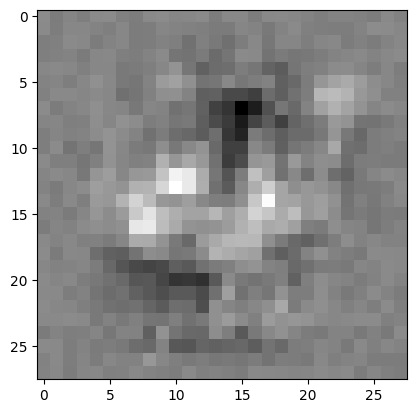

Epoch[74/100], loss: 0.143632, acc: 0.975000


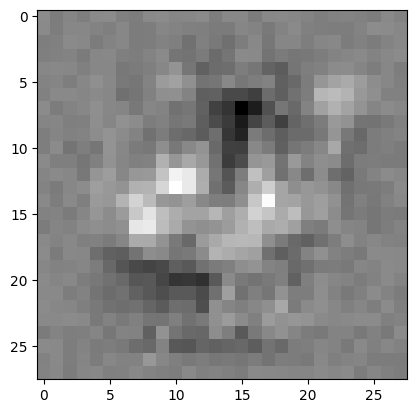

Epoch[75/100], loss: 0.143247, acc: 0.975000


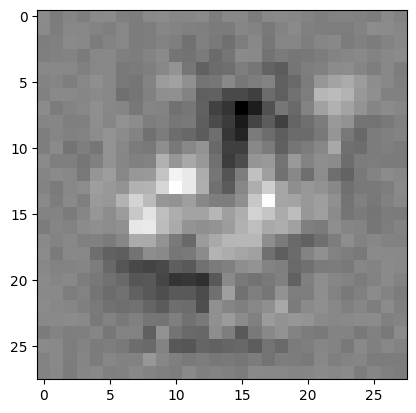

Epoch[76/100], loss: 0.142863, acc: 0.975000


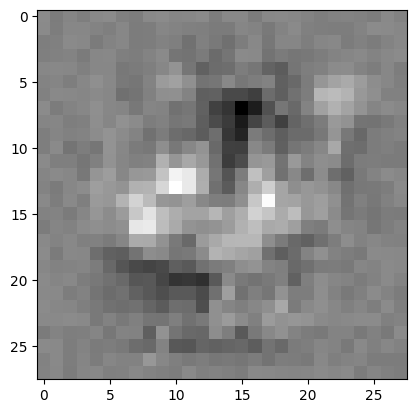

Epoch[77/100], loss: 0.142482, acc: 0.975000


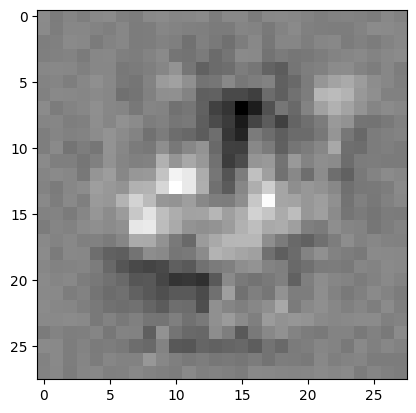

Epoch[78/100], loss: 0.142102, acc: 0.975000


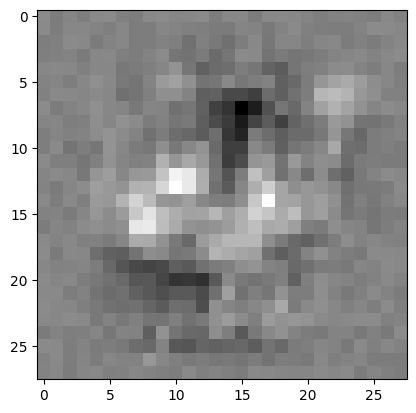

Epoch[79/100], loss: 0.141724, acc: 0.976000


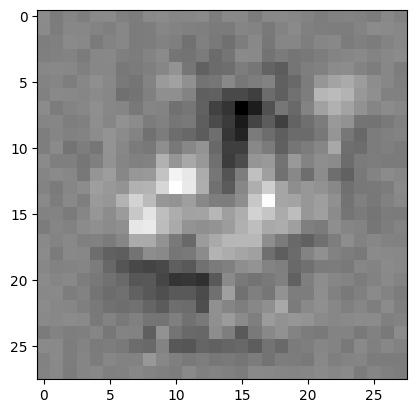

Epoch[80/100], loss: 0.141348, acc: 0.976000


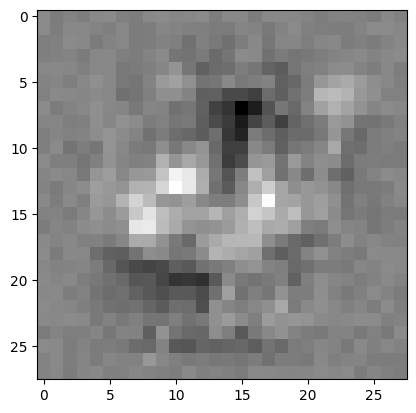

Epoch[81/100], loss: 0.140974, acc: 0.976000


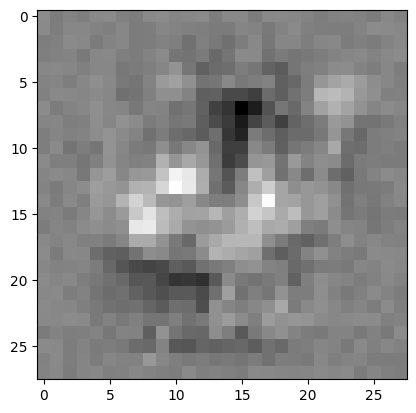

Epoch[82/100], loss: 0.140601, acc: 0.976000


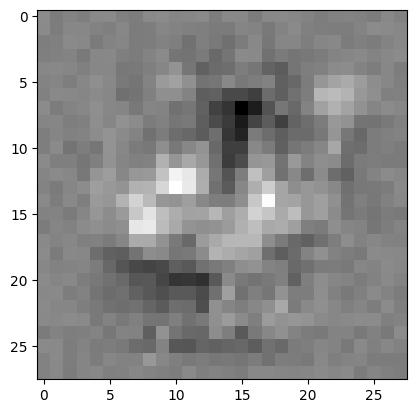

Epoch[83/100], loss: 0.140230, acc: 0.976000


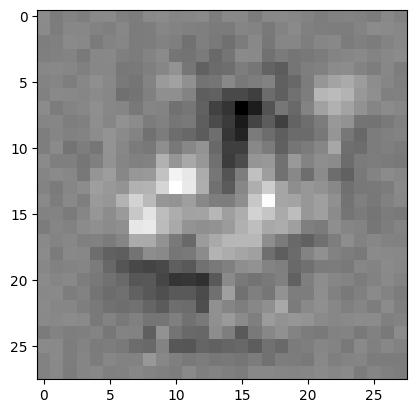

Epoch[84/100], loss: 0.139861, acc: 0.976000


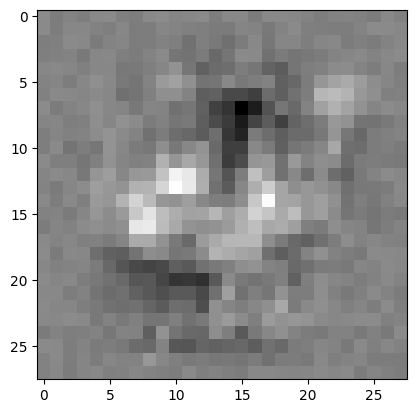

Epoch[85/100], loss: 0.139494, acc: 0.976000


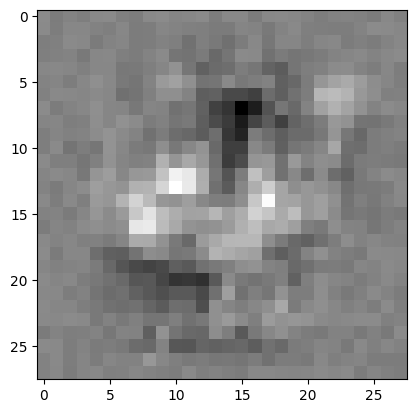

Epoch[86/100], loss: 0.139129, acc: 0.976000


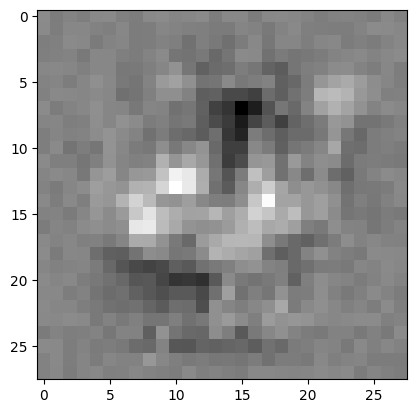

Epoch[87/100], loss: 0.138765, acc: 0.976000


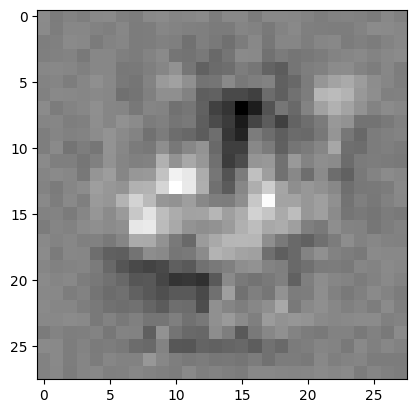

Epoch[88/100], loss: 0.138403, acc: 0.976000


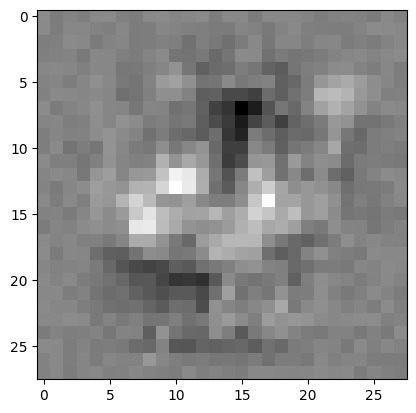

Epoch[89/100], loss: 0.138043, acc: 0.976000


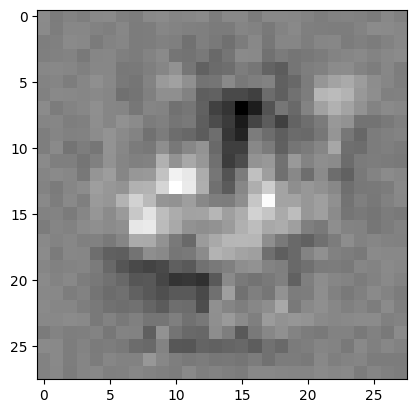

Epoch[90/100], loss: 0.137684, acc: 0.976000


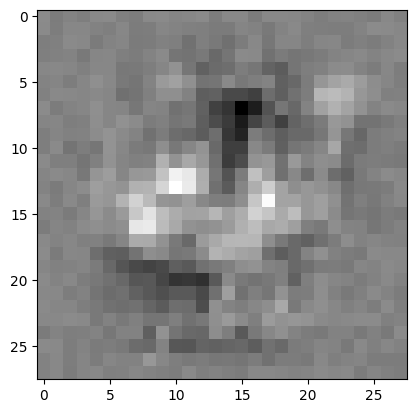

Epoch[91/100], loss: 0.137327, acc: 0.976000


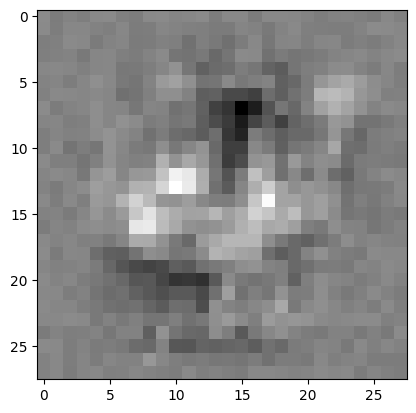

Epoch[92/100], loss: 0.136972, acc: 0.977000


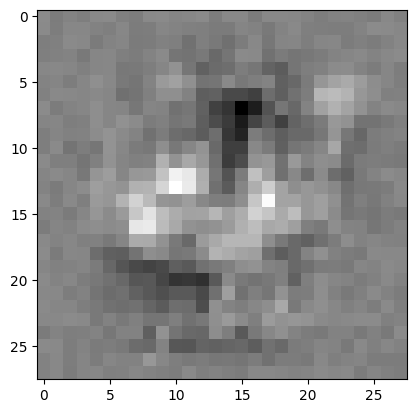

Epoch[93/100], loss: 0.136618, acc: 0.977000


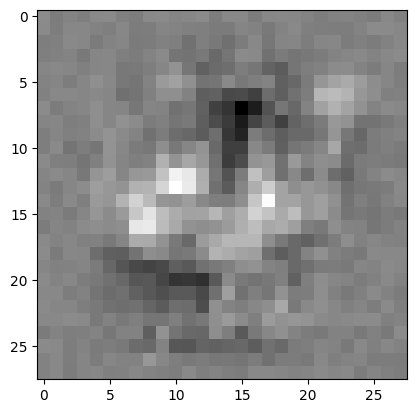

Epoch[94/100], loss: 0.136266, acc: 0.977000


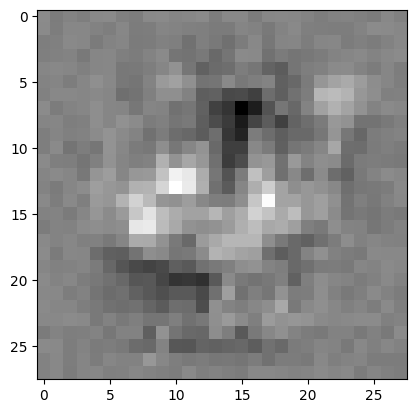

Epoch[95/100], loss: 0.135916, acc: 0.977000


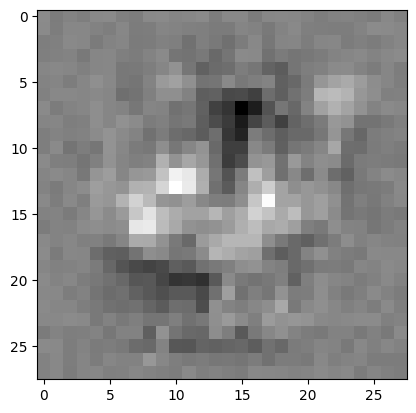

Epoch[96/100], loss: 0.135567, acc: 0.977000


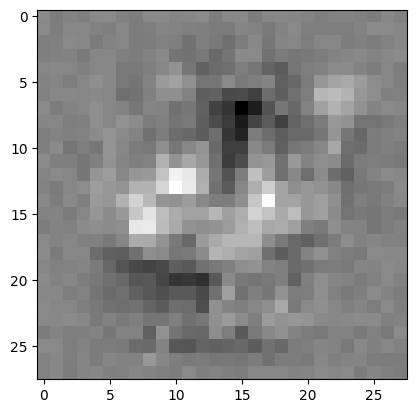

Epoch[97/100], loss: 0.135220, acc: 0.977000


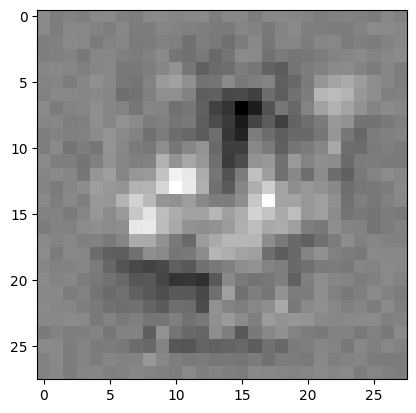

Epoch[98/100], loss: 0.134875, acc: 0.977000


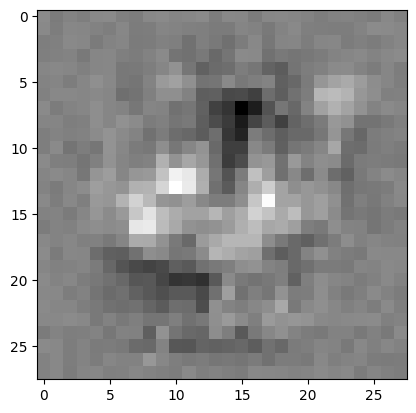

Epoch[99/100], loss: 0.134531, acc: 0.977000


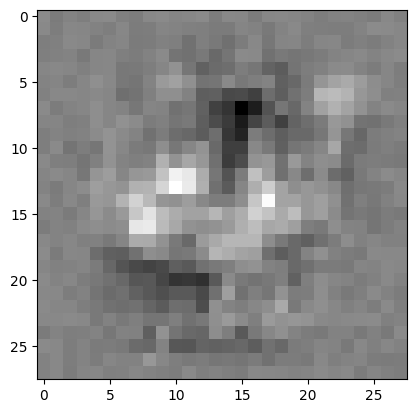

Epoch[100/100], loss: 0.134189, acc: 0.977000


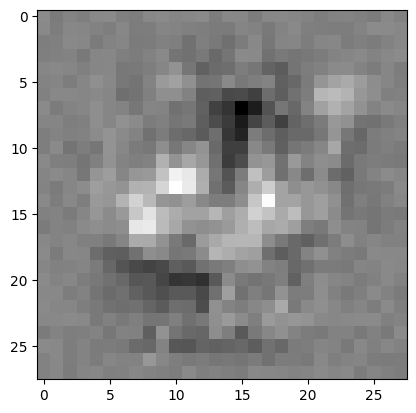

In [38]:
# 1.
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

Epoch[1/100], loss: 0.133848, acc: 0.977000


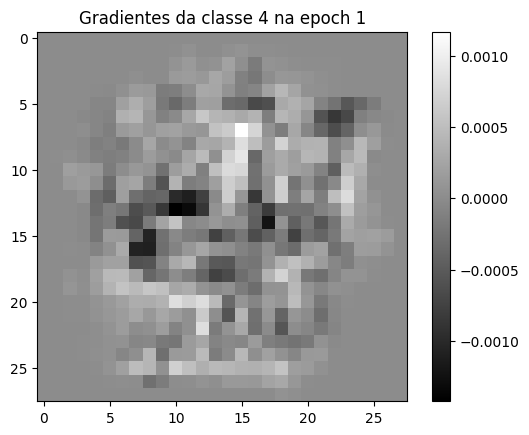

Epoch[2/100], loss: 0.133509, acc: 0.977000


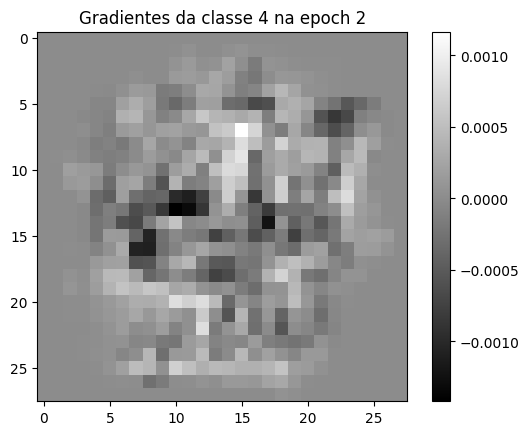

Epoch[3/100], loss: 0.133171, acc: 0.977000


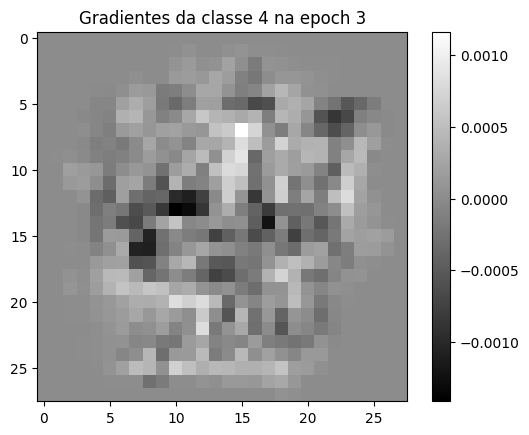

Epoch[4/100], loss: 0.132835, acc: 0.977000


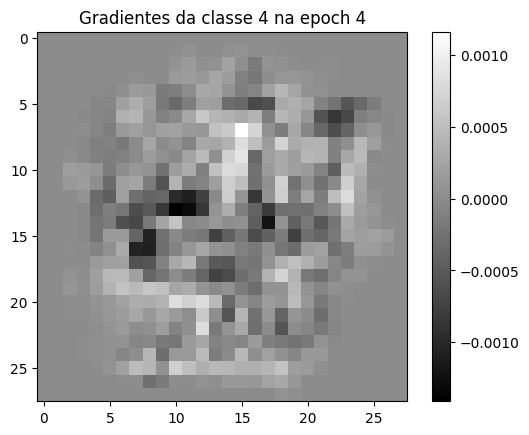

Epoch[5/100], loss: 0.132501, acc: 0.977000


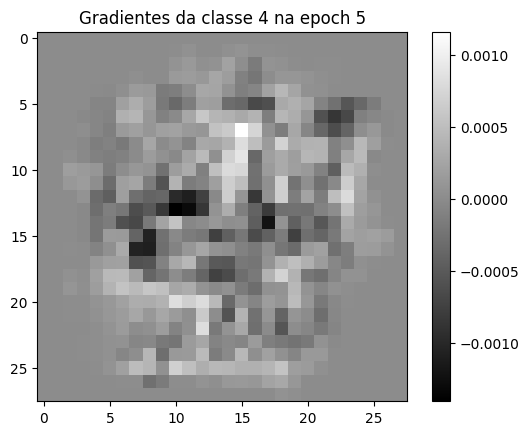

Epoch[6/100], loss: 0.132168, acc: 0.977000


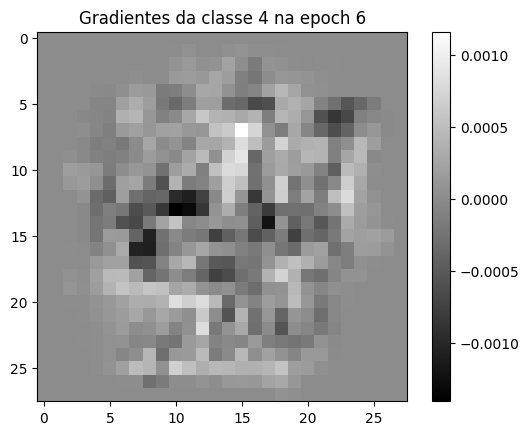

Epoch[7/100], loss: 0.131836, acc: 0.978000


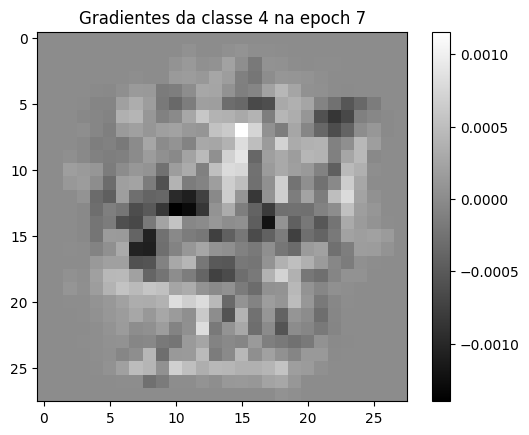

Epoch[8/100], loss: 0.131506, acc: 0.978000


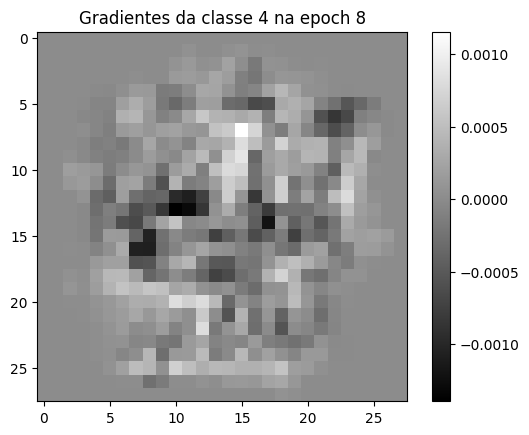

Epoch[9/100], loss: 0.131178, acc: 0.978000


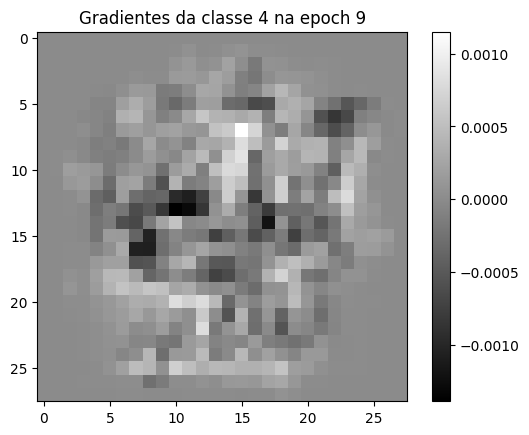

Epoch[10/100], loss: 0.130851, acc: 0.978000


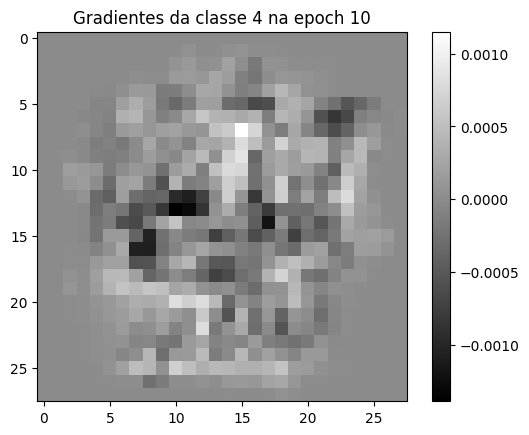

Epoch[11/100], loss: 0.130525, acc: 0.978000


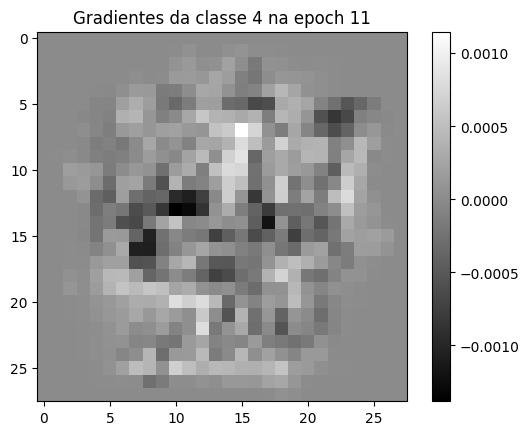

Epoch[12/100], loss: 0.130201, acc: 0.978000


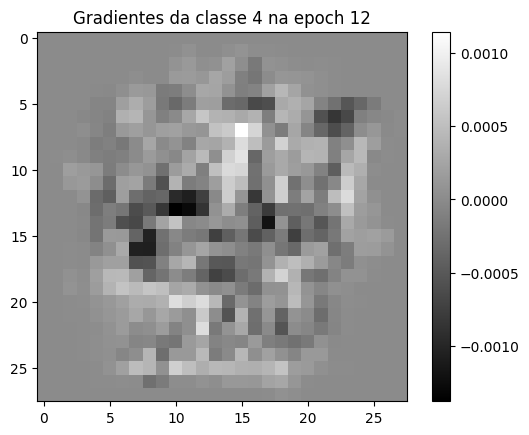

Epoch[13/100], loss: 0.129878, acc: 0.978000


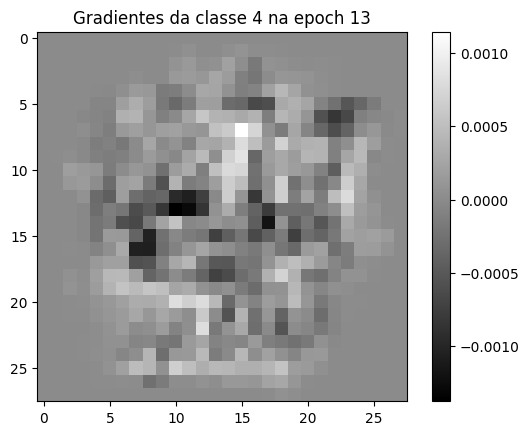

Epoch[14/100], loss: 0.129557, acc: 0.978000


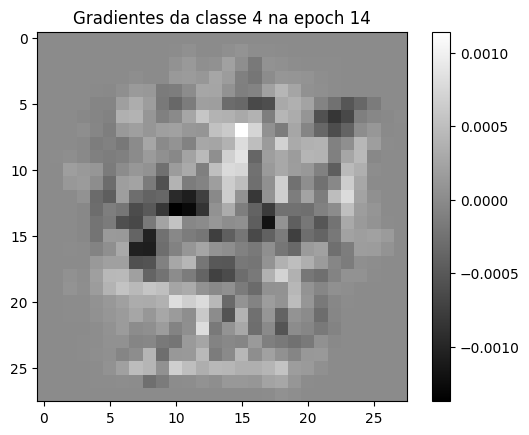

Epoch[15/100], loss: 0.129238, acc: 0.978000


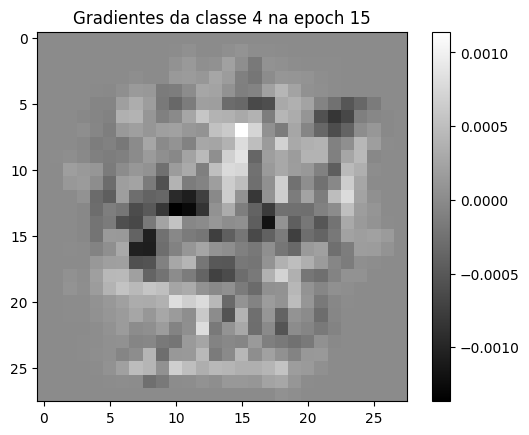

Epoch[16/100], loss: 0.128919, acc: 0.978000


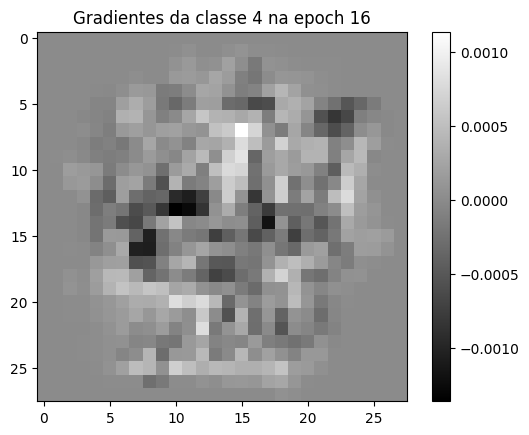

Epoch[17/100], loss: 0.128602, acc: 0.978000


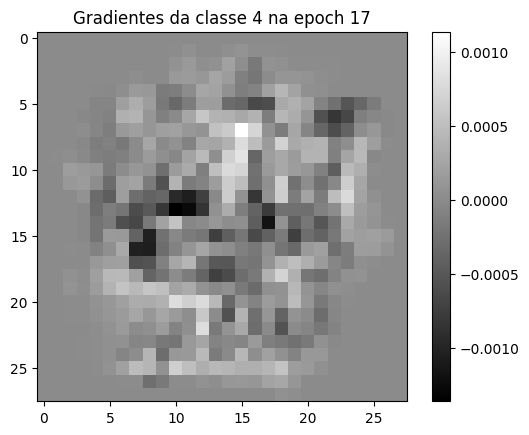

Epoch[18/100], loss: 0.128287, acc: 0.978000


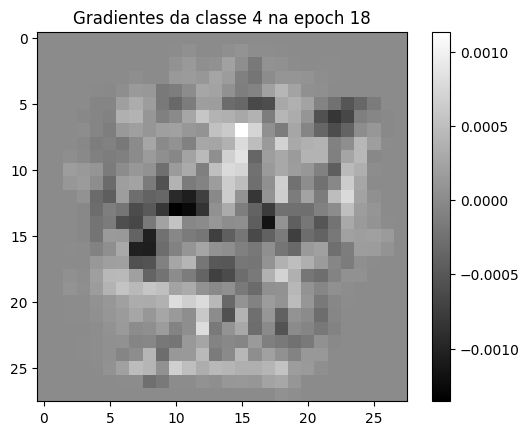

Epoch[19/100], loss: 0.127973, acc: 0.978000


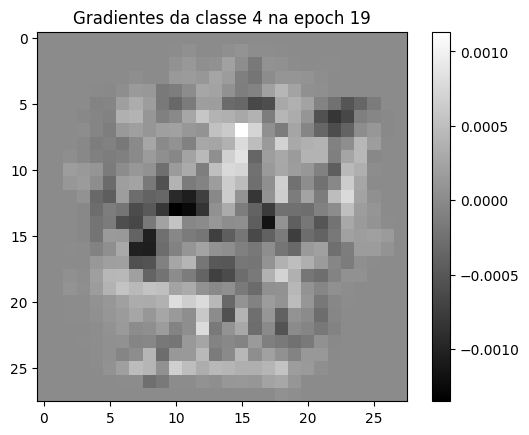

Epoch[20/100], loss: 0.127660, acc: 0.978000


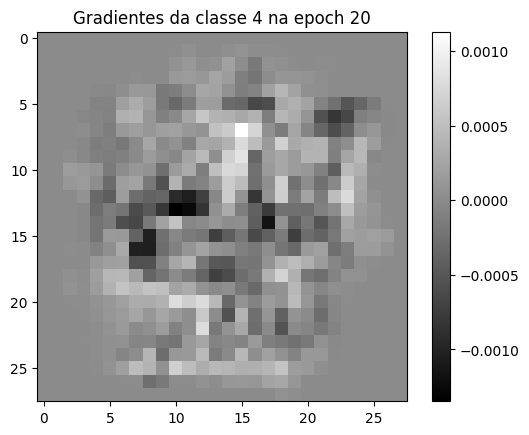

Epoch[21/100], loss: 0.127349, acc: 0.978000


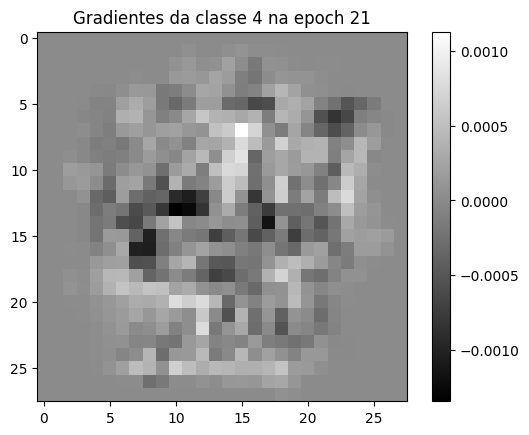

Epoch[22/100], loss: 0.127039, acc: 0.979000


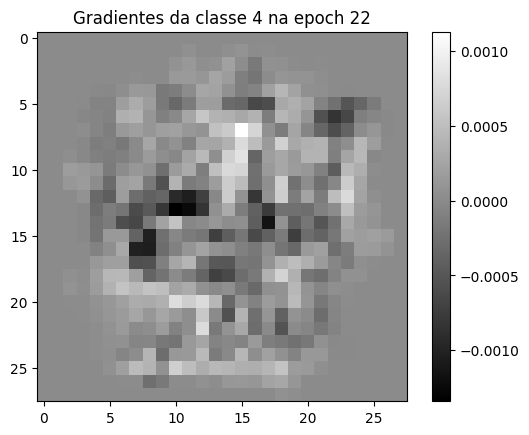

Epoch[23/100], loss: 0.126730, acc: 0.979000


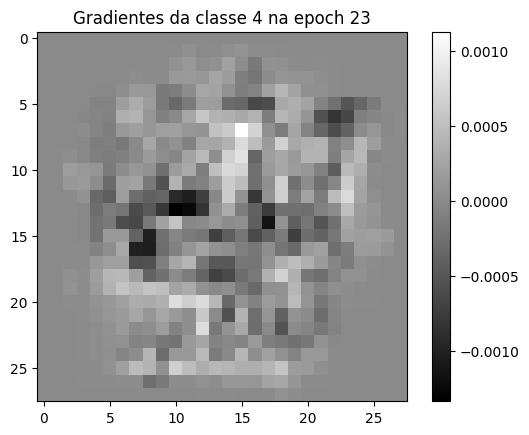

Epoch[24/100], loss: 0.126423, acc: 0.979000


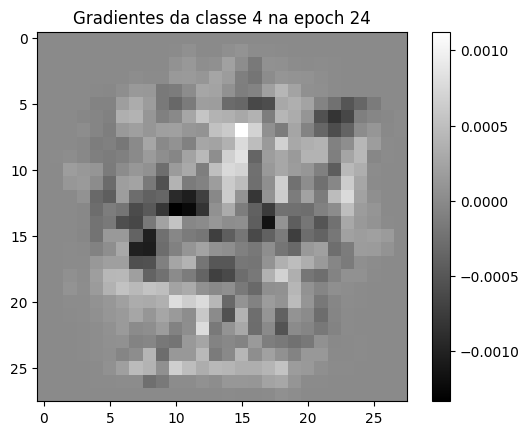

Epoch[25/100], loss: 0.126117, acc: 0.979000


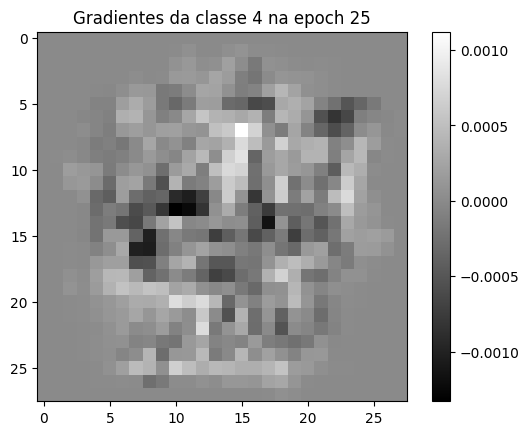

Epoch[26/100], loss: 0.125812, acc: 0.980000


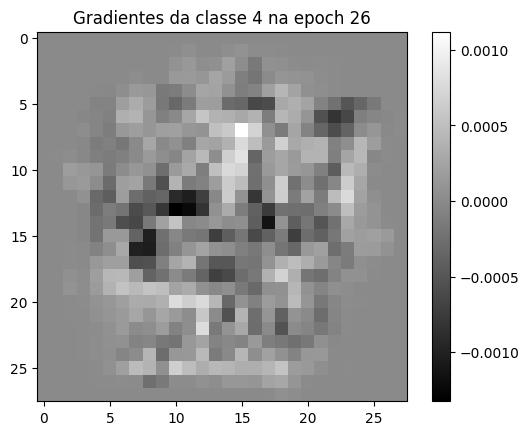

Epoch[27/100], loss: 0.125509, acc: 0.980000


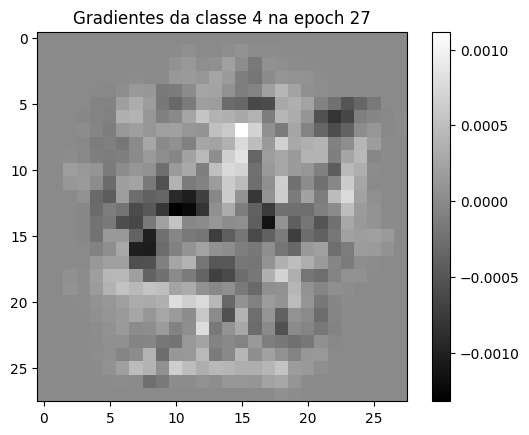

Epoch[28/100], loss: 0.125207, acc: 0.980000


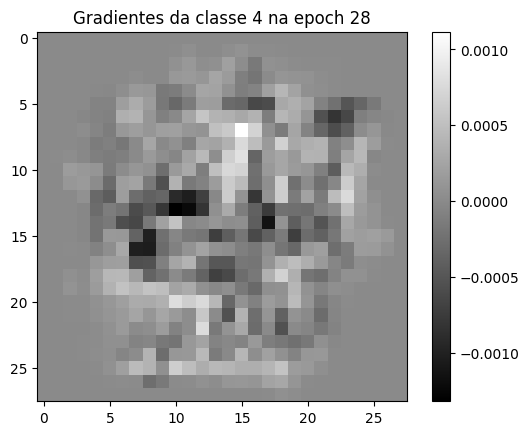

Epoch[29/100], loss: 0.124906, acc: 0.980000


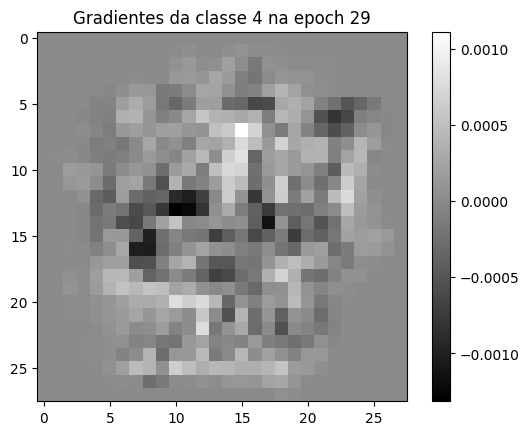

Epoch[30/100], loss: 0.124607, acc: 0.980000


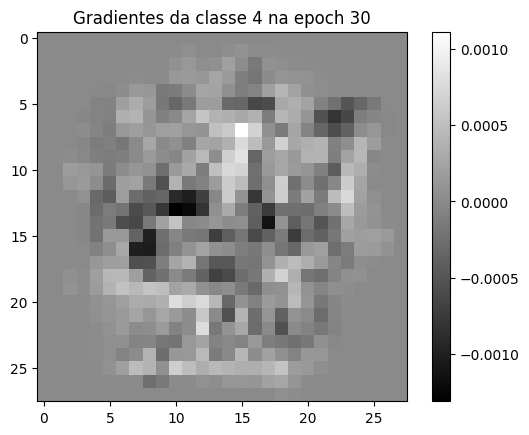

Epoch[31/100], loss: 0.124309, acc: 0.980000


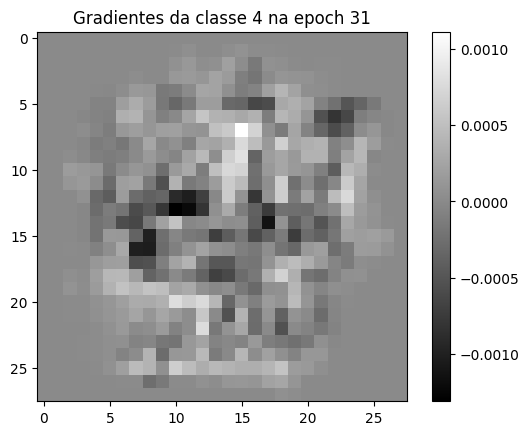

Epoch[32/100], loss: 0.124012, acc: 0.981000


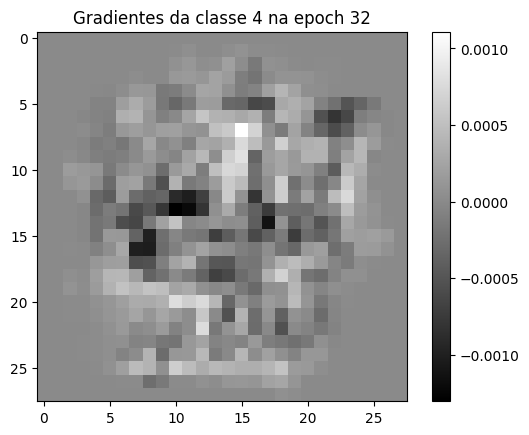

Epoch[33/100], loss: 0.123717, acc: 0.981000


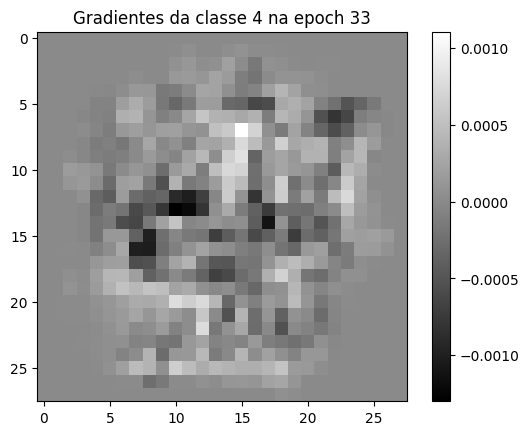

Epoch[34/100], loss: 0.123422, acc: 0.981000


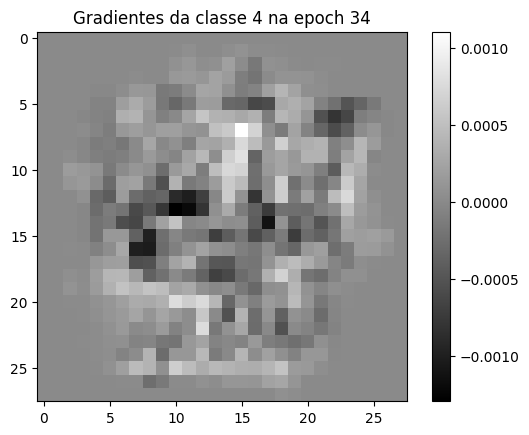

Epoch[35/100], loss: 0.123129, acc: 0.981000


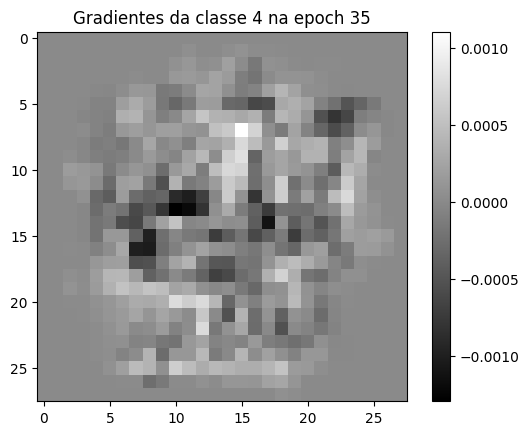

Epoch[36/100], loss: 0.122838, acc: 0.981000


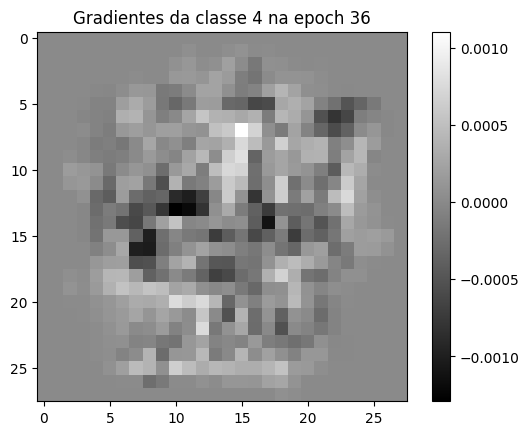

Epoch[37/100], loss: 0.122547, acc: 0.983000


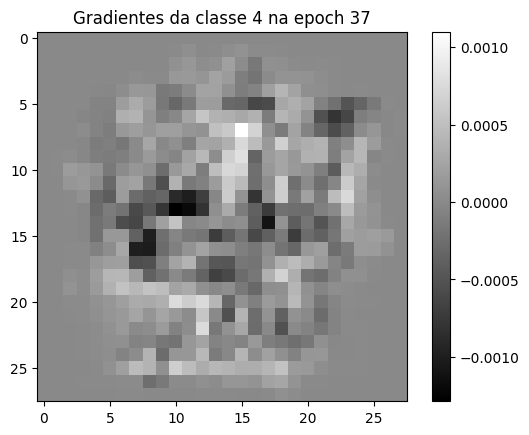

Epoch[38/100], loss: 0.122258, acc: 0.983000


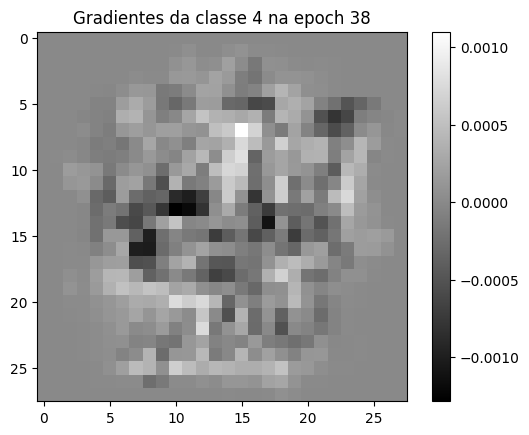

Epoch[39/100], loss: 0.121970, acc: 0.983000


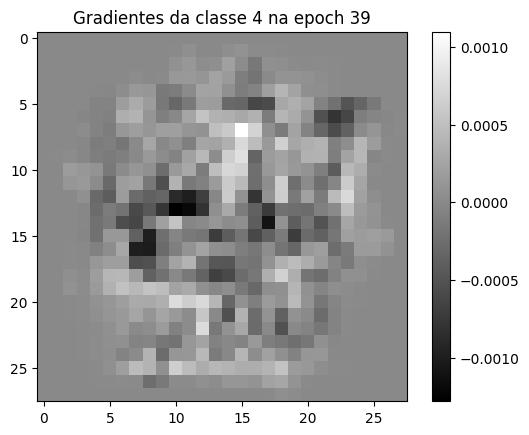

Epoch[40/100], loss: 0.121683, acc: 0.983000


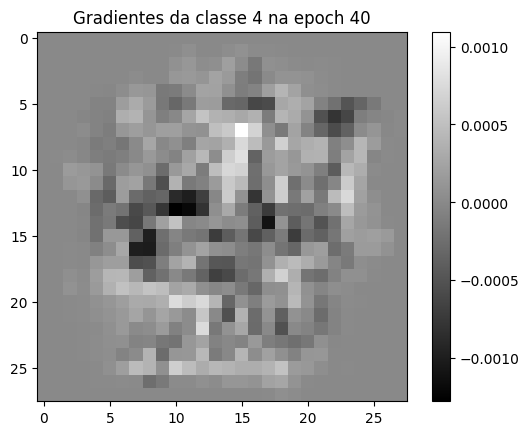

Epoch[41/100], loss: 0.121398, acc: 0.984000


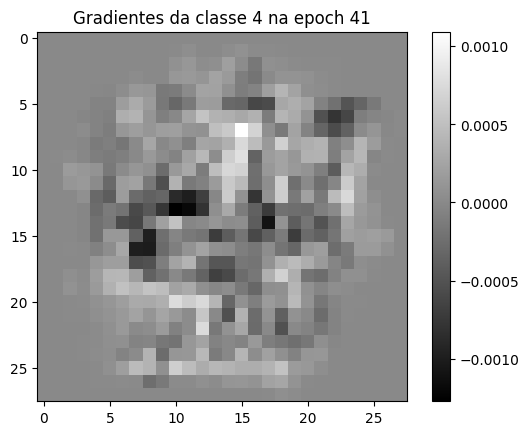

Epoch[42/100], loss: 0.121113, acc: 0.984000


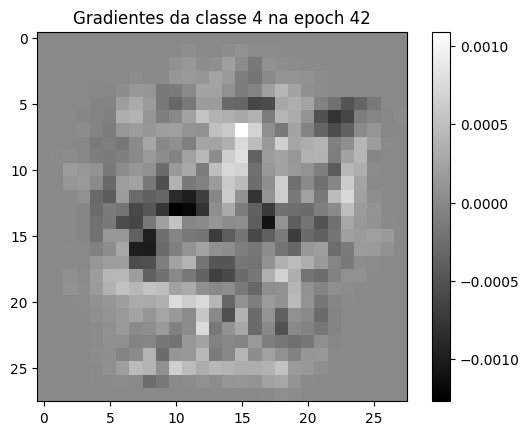

Epoch[43/100], loss: 0.120830, acc: 0.984000


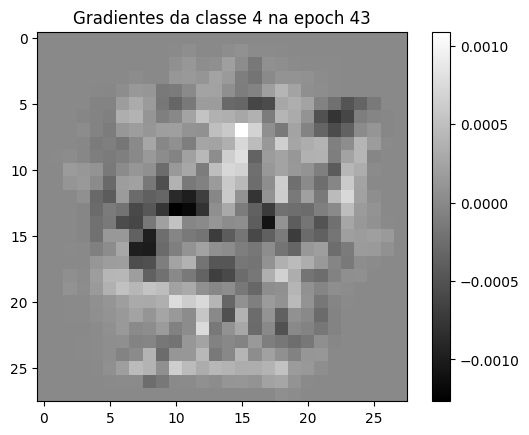

Epoch[44/100], loss: 0.120548, acc: 0.985000


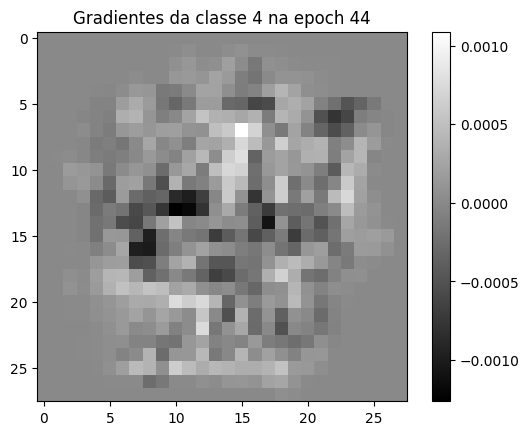

Epoch[45/100], loss: 0.120267, acc: 0.985000


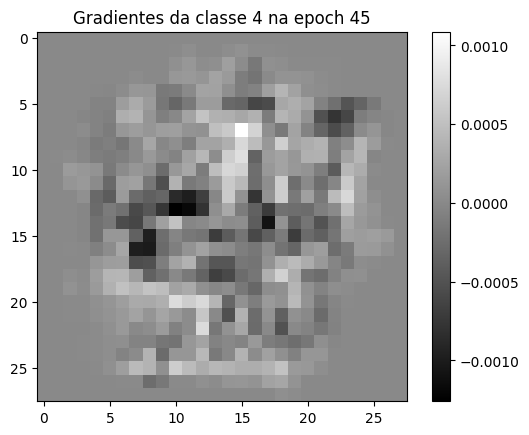

Epoch[46/100], loss: 0.119988, acc: 0.986000


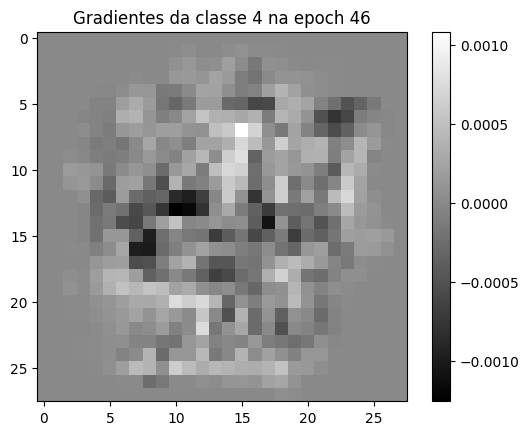

Epoch[47/100], loss: 0.119709, acc: 0.986000


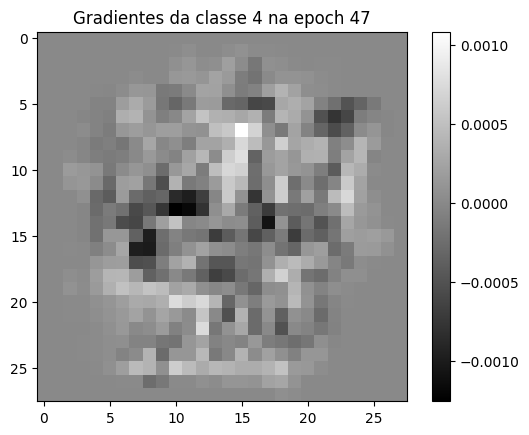

Epoch[48/100], loss: 0.119432, acc: 0.987000


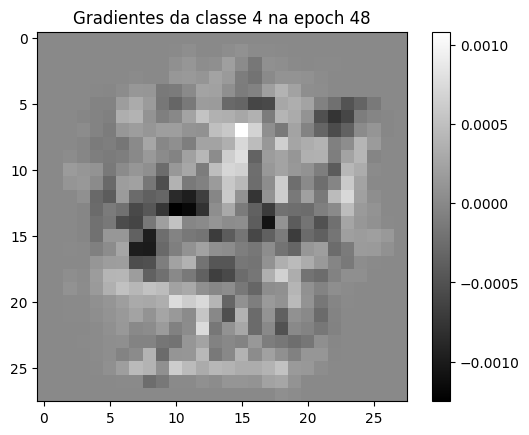

Epoch[49/100], loss: 0.119156, acc: 0.987000


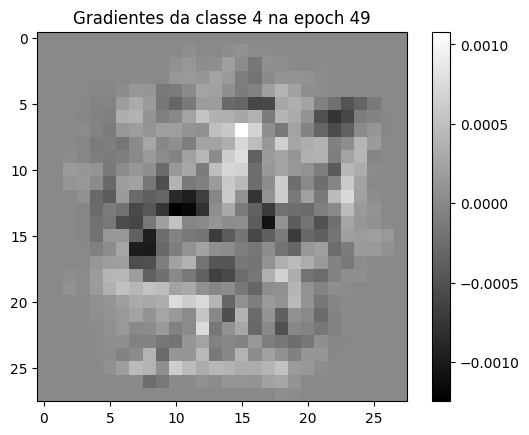

Epoch[50/100], loss: 0.118881, acc: 0.987000


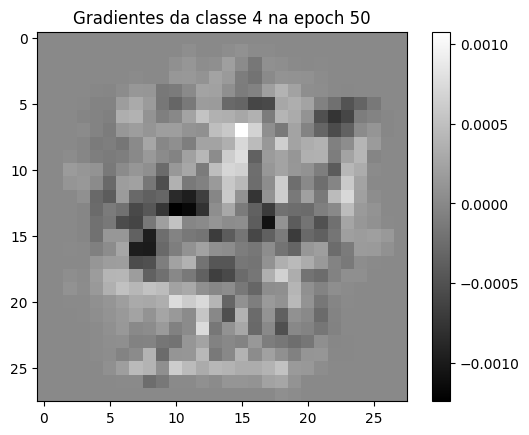

Epoch[51/100], loss: 0.118607, acc: 0.987000


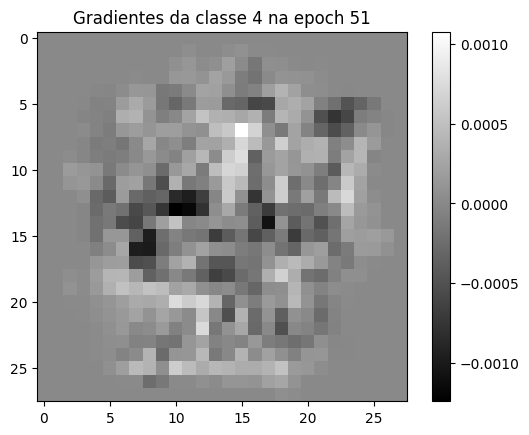

Epoch[52/100], loss: 0.118335, acc: 0.987000


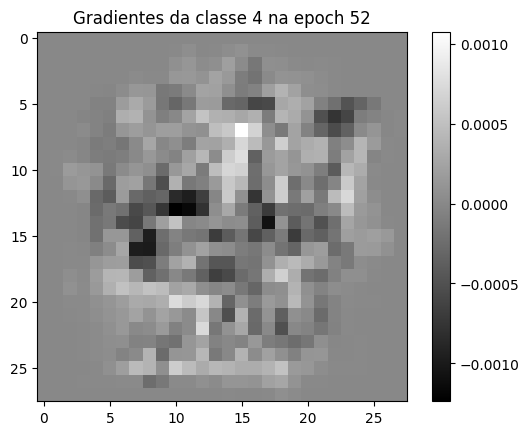

Epoch[53/100], loss: 0.118063, acc: 0.987000


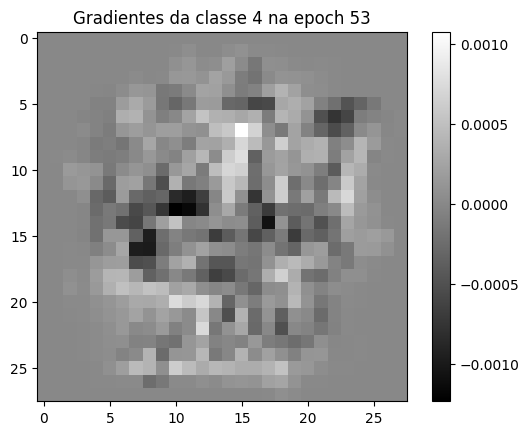

Epoch[54/100], loss: 0.117793, acc: 0.987000


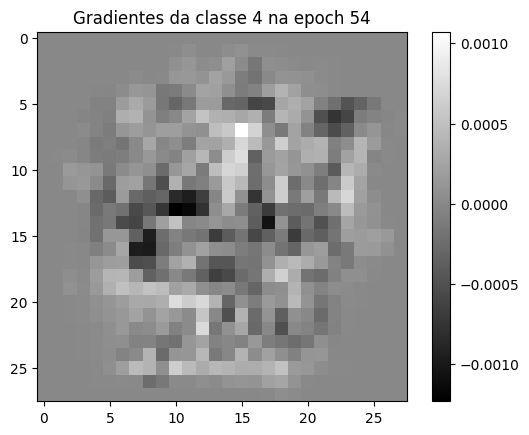

Epoch[55/100], loss: 0.117523, acc: 0.987000


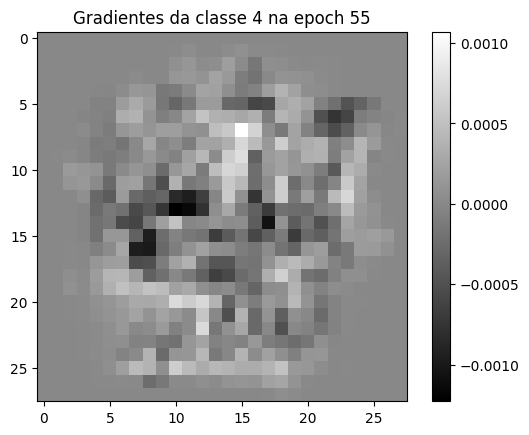

Epoch[56/100], loss: 0.117255, acc: 0.987000


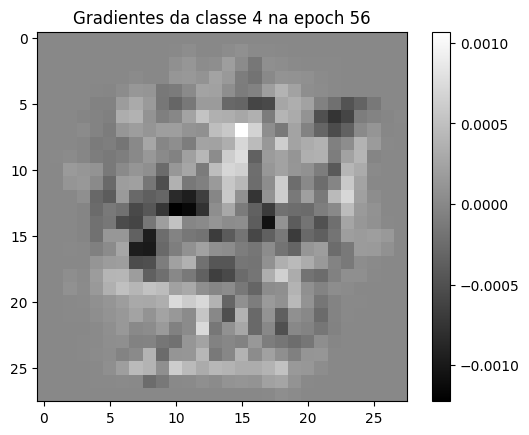

Epoch[57/100], loss: 0.116988, acc: 0.987000


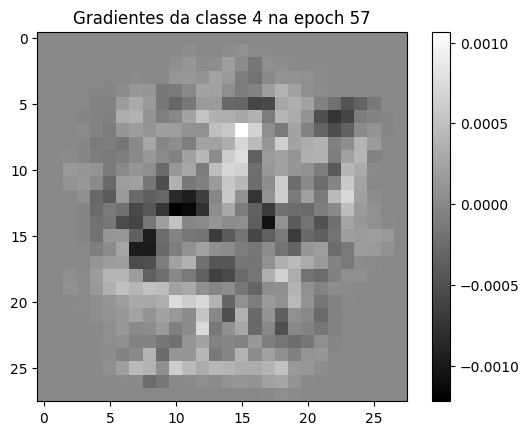

Epoch[58/100], loss: 0.116722, acc: 0.987000


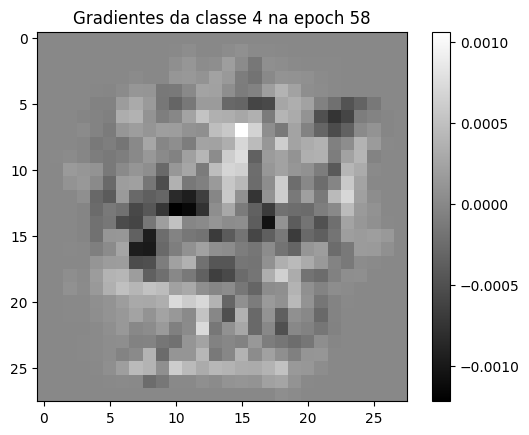

Epoch[59/100], loss: 0.116457, acc: 0.987000


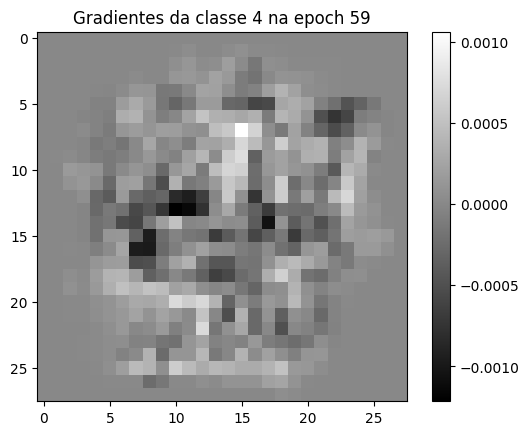

Epoch[60/100], loss: 0.116193, acc: 0.987000


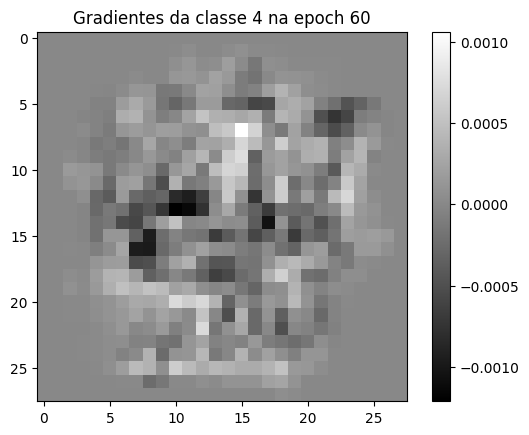

Epoch[61/100], loss: 0.115930, acc: 0.987000


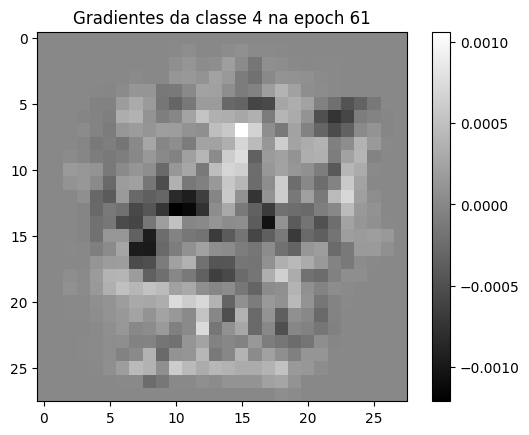

Epoch[62/100], loss: 0.115669, acc: 0.988000


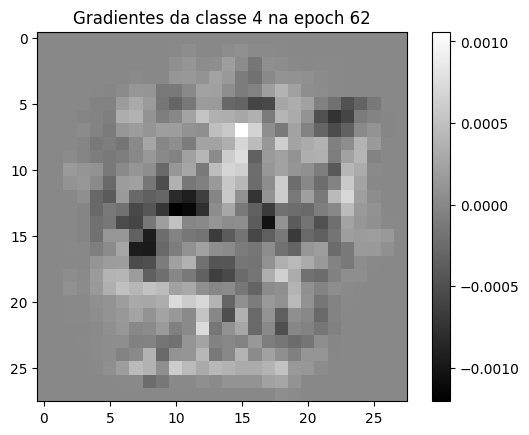

Epoch[63/100], loss: 0.115408, acc: 0.988000


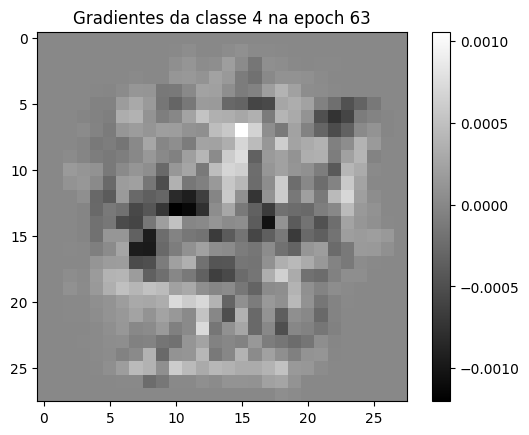

Epoch[64/100], loss: 0.115149, acc: 0.988000


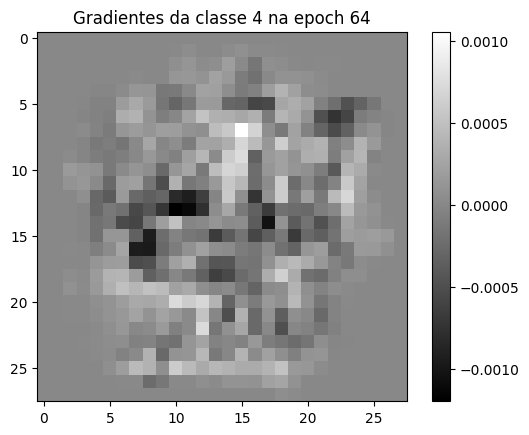

Epoch[65/100], loss: 0.114890, acc: 0.988000


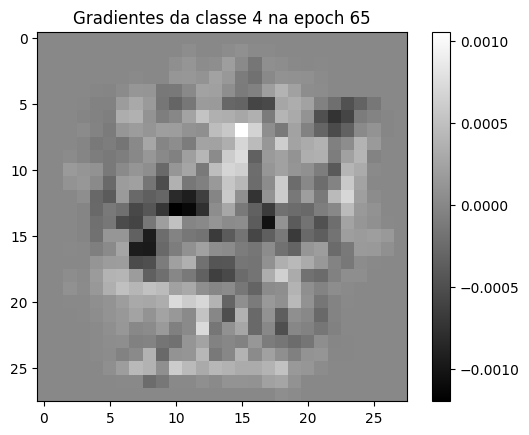

Epoch[66/100], loss: 0.114633, acc: 0.988000


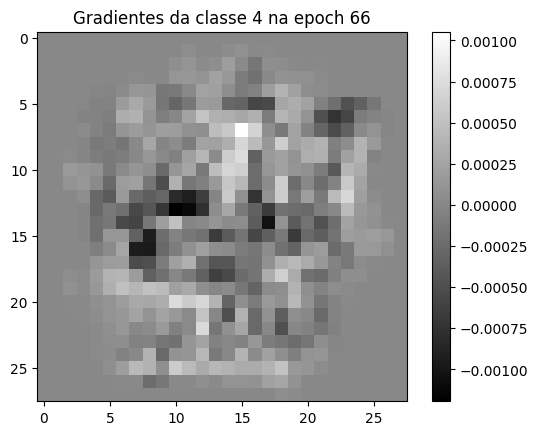

Epoch[67/100], loss: 0.114376, acc: 0.989000


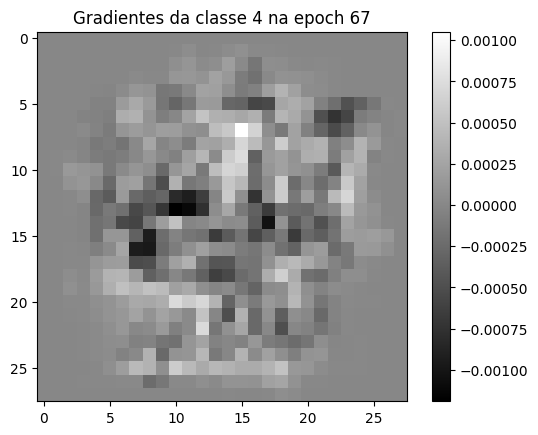

Epoch[68/100], loss: 0.114121, acc: 0.989000


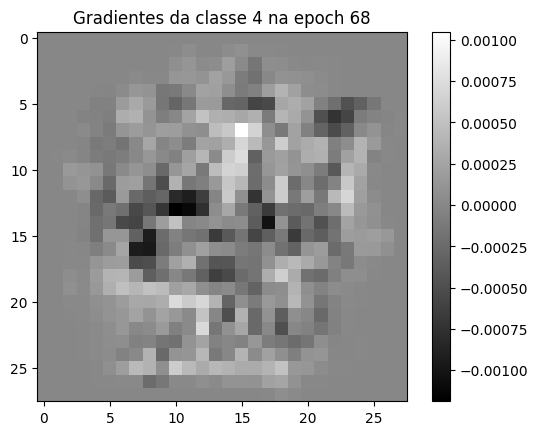

Epoch[69/100], loss: 0.113866, acc: 0.989000


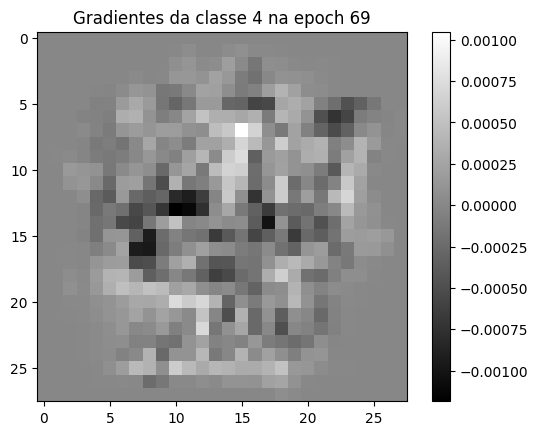

Epoch[70/100], loss: 0.113613, acc: 0.989000


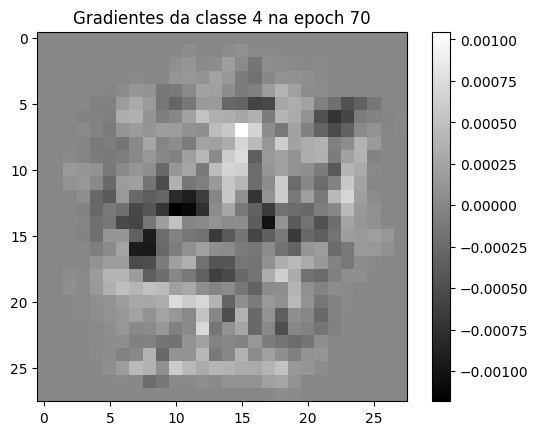

Epoch[71/100], loss: 0.113361, acc: 0.989000


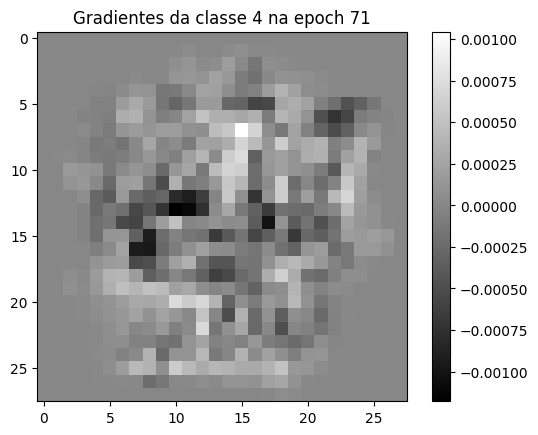

Epoch[72/100], loss: 0.113109, acc: 0.989000


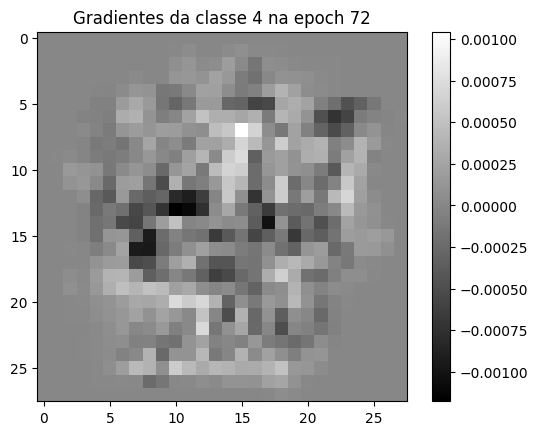

Epoch[73/100], loss: 0.112859, acc: 0.989000


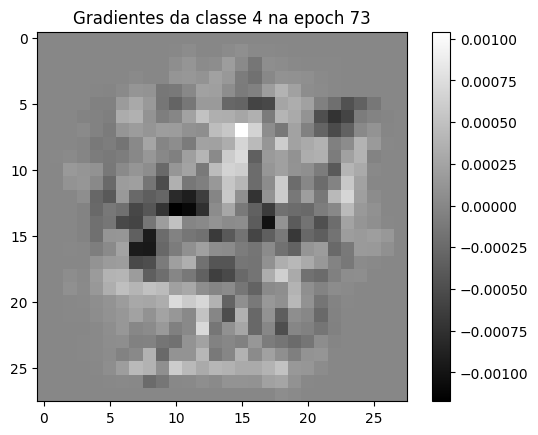

Epoch[74/100], loss: 0.112610, acc: 0.989000


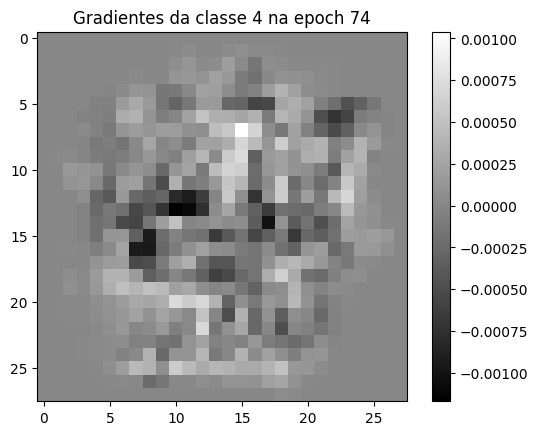

Epoch[75/100], loss: 0.112361, acc: 0.989000


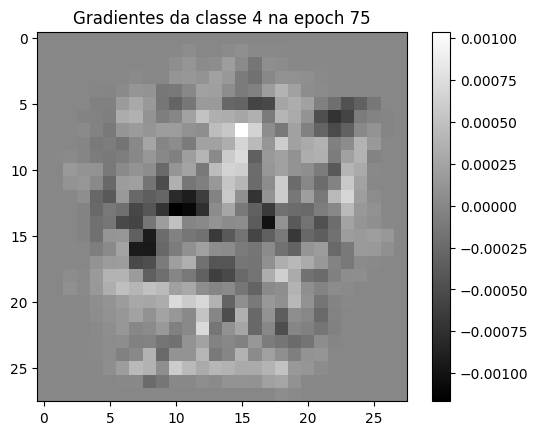

Epoch[76/100], loss: 0.112114, acc: 0.989000


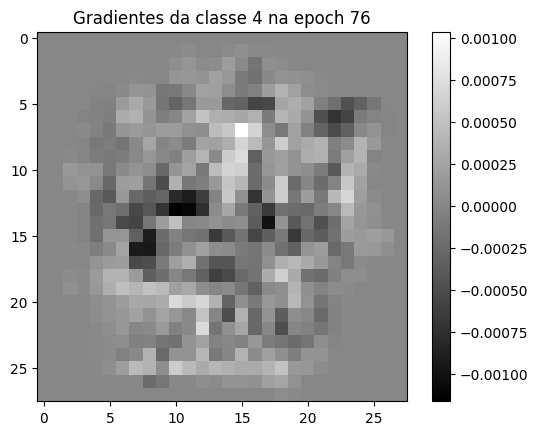

Epoch[77/100], loss: 0.111868, acc: 0.989000


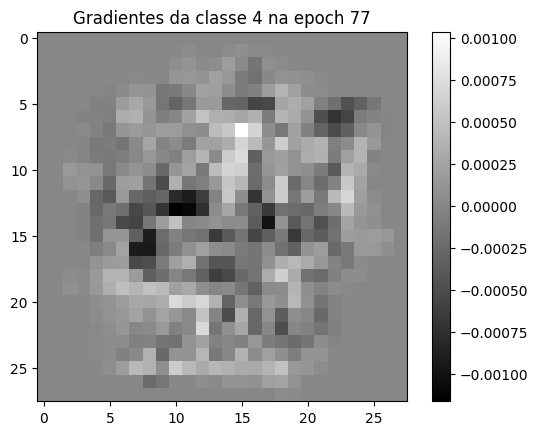

Epoch[78/100], loss: 0.111622, acc: 0.989000


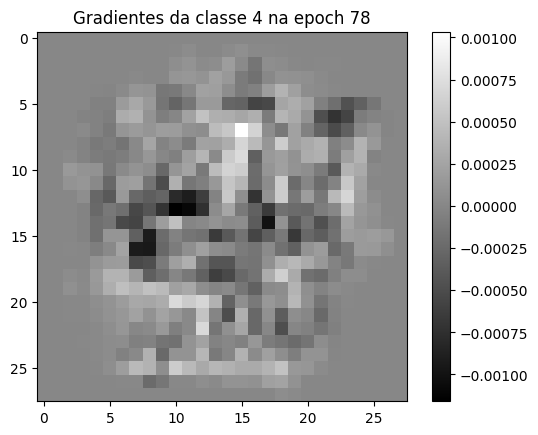

Epoch[79/100], loss: 0.111378, acc: 0.989000


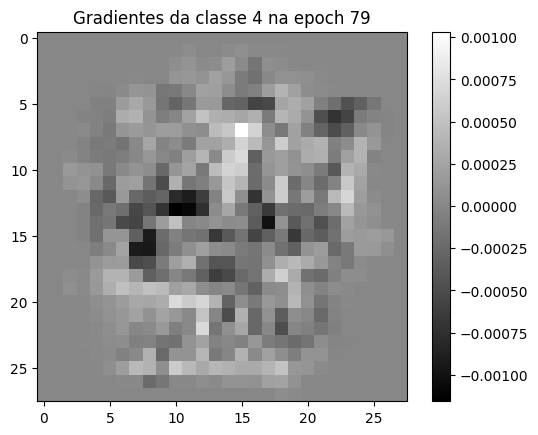

Epoch[80/100], loss: 0.111135, acc: 0.989000


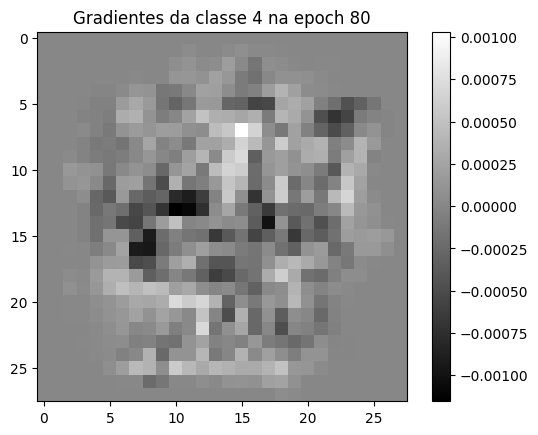

Epoch[81/100], loss: 0.110892, acc: 0.989000


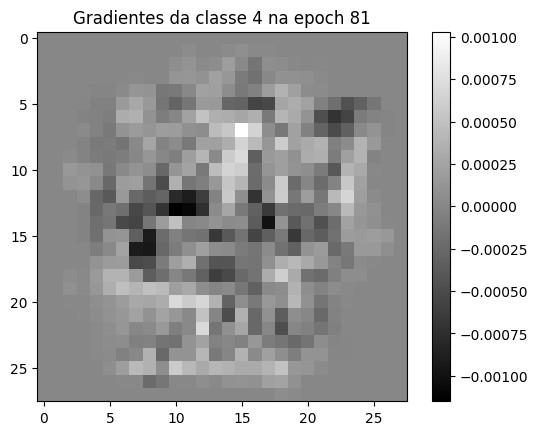

Epoch[82/100], loss: 0.110651, acc: 0.989000


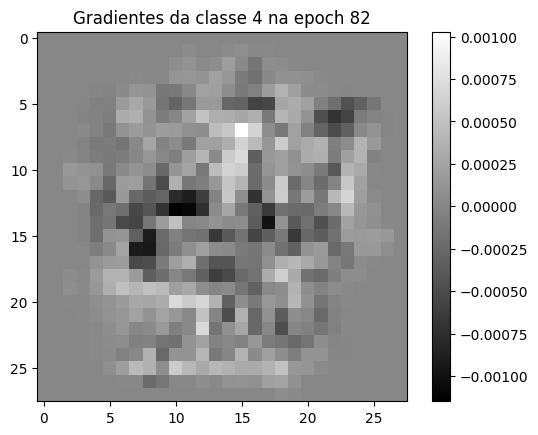

Epoch[83/100], loss: 0.110410, acc: 0.989000


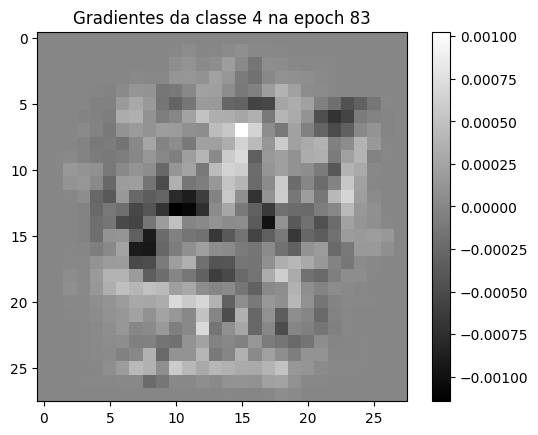

Epoch[84/100], loss: 0.110170, acc: 0.989000


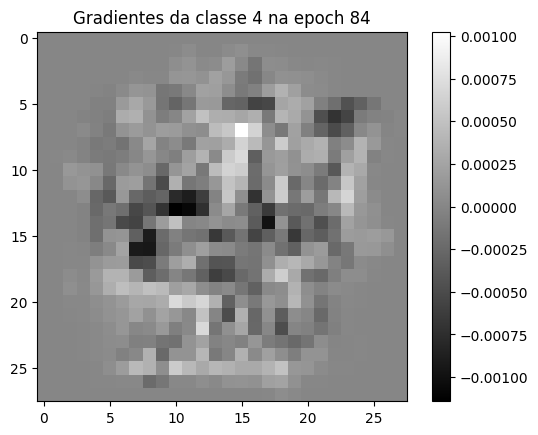

Epoch[85/100], loss: 0.109932, acc: 0.989000


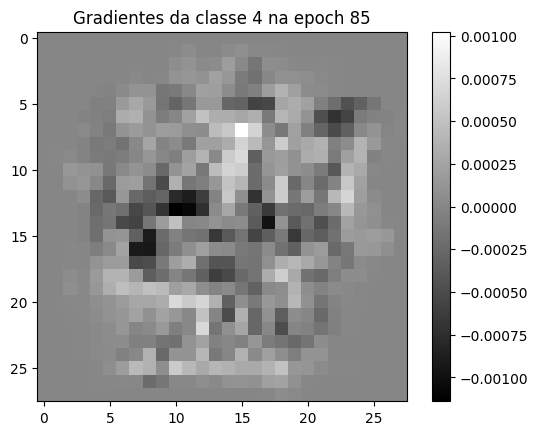

Epoch[86/100], loss: 0.109694, acc: 0.989000


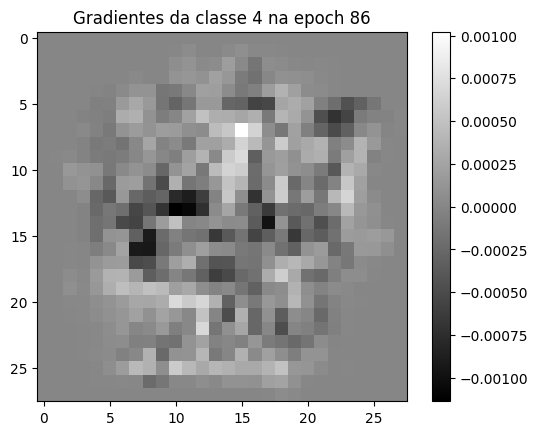

Epoch[87/100], loss: 0.109457, acc: 0.989000


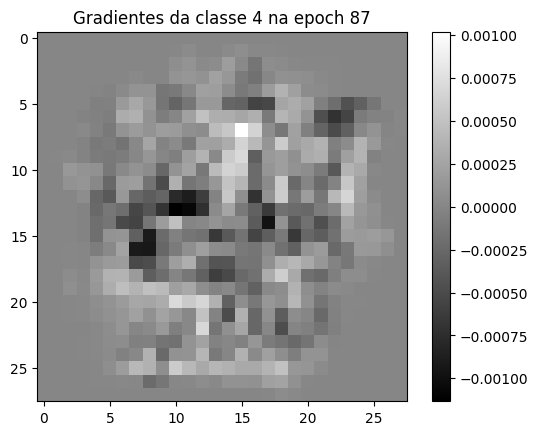

Epoch[88/100], loss: 0.109221, acc: 0.989000


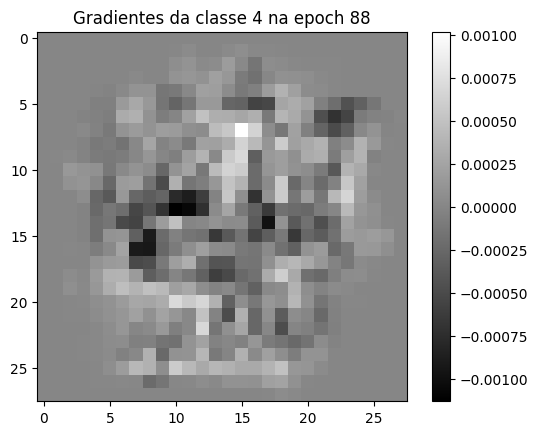

Epoch[89/100], loss: 0.108986, acc: 0.989000


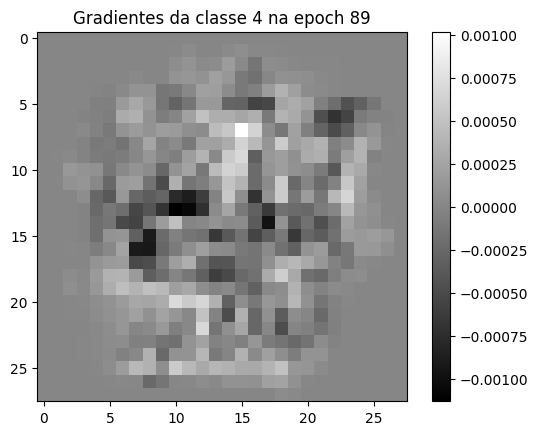

Epoch[90/100], loss: 0.108752, acc: 0.989000


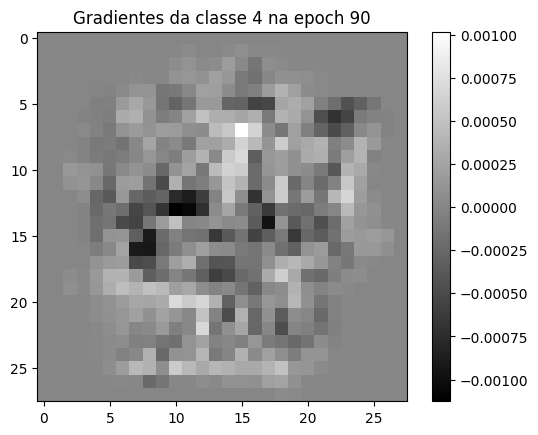

Epoch[91/100], loss: 0.108519, acc: 0.989000


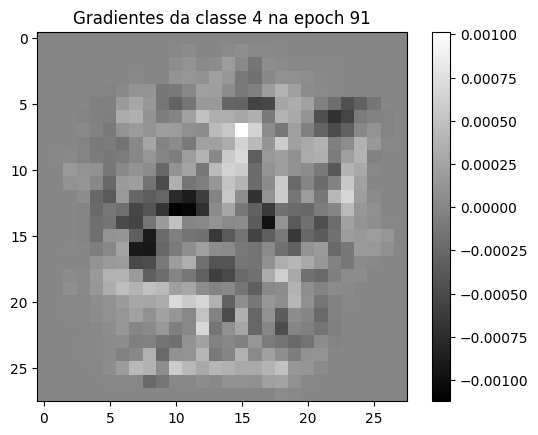

Epoch[92/100], loss: 0.108287, acc: 0.989000


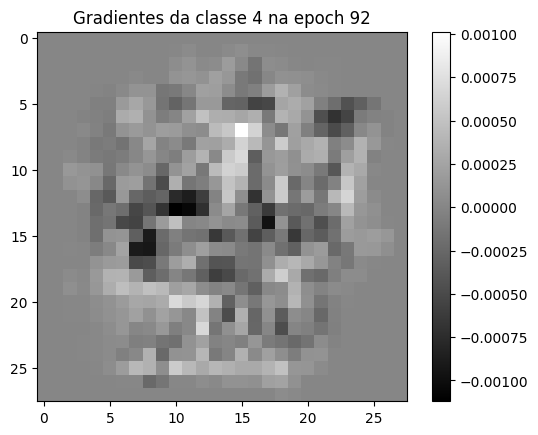

Epoch[93/100], loss: 0.108055, acc: 0.989000


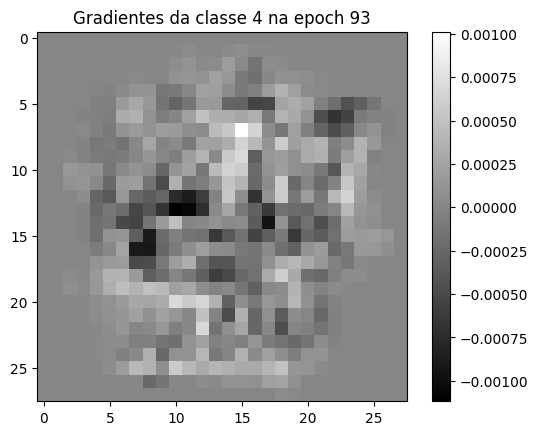

Epoch[94/100], loss: 0.107825, acc: 0.989000


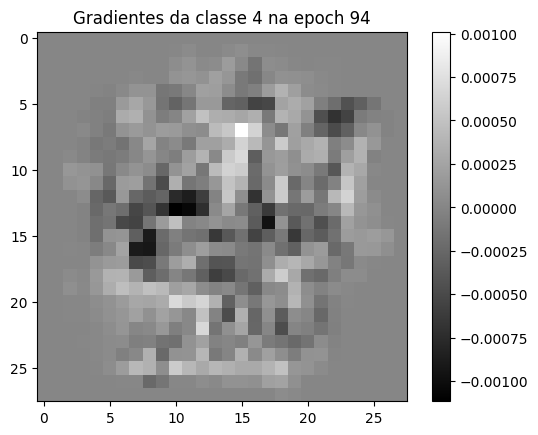

Epoch[95/100], loss: 0.107595, acc: 0.989000


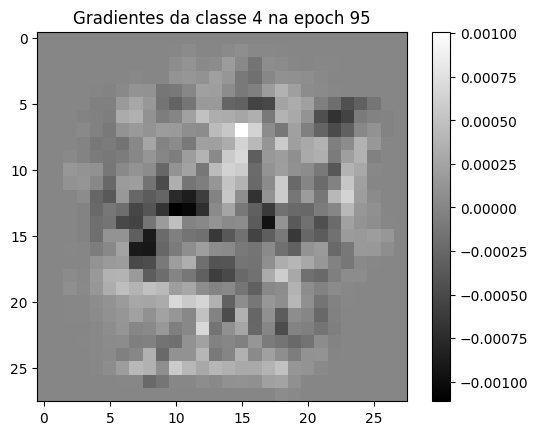

Epoch[96/100], loss: 0.107366, acc: 0.990000


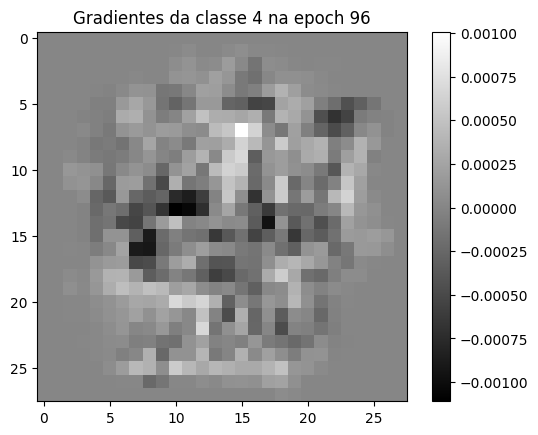

Epoch[97/100], loss: 0.107139, acc: 0.991000


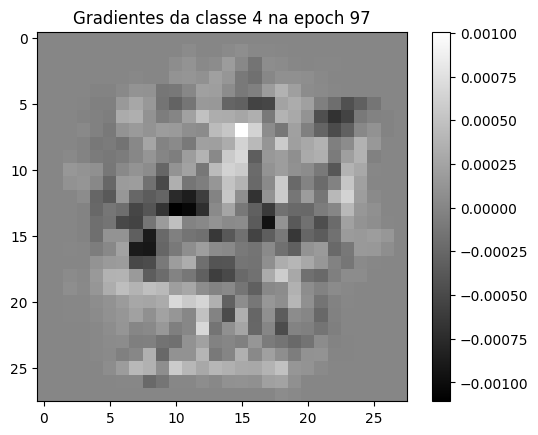

Epoch[98/100], loss: 0.106912, acc: 0.991000


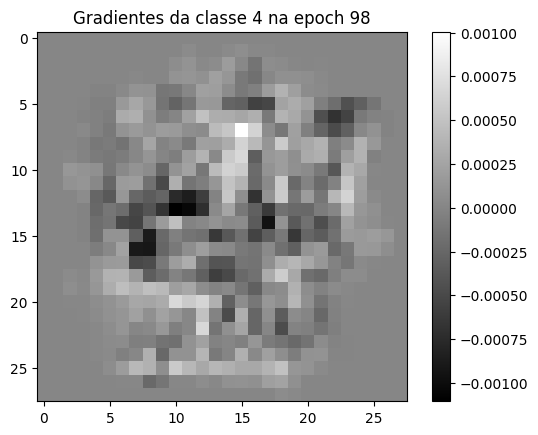

Epoch[99/100], loss: 0.106685, acc: 0.991000


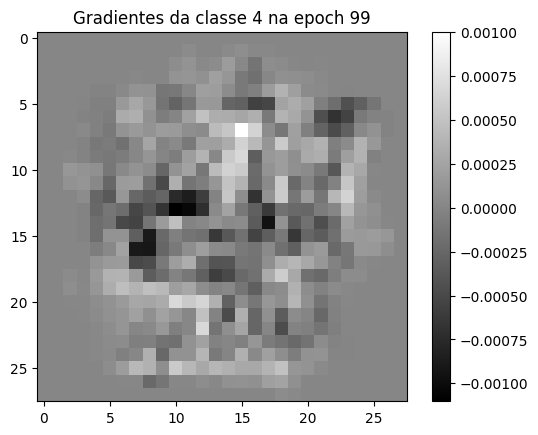

Epoch[100/100], loss: 0.106460, acc: 0.991000


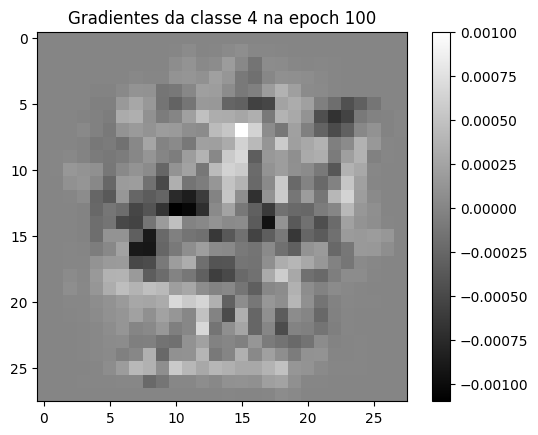

In [39]:
# 2.
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    # calcula os gradientes da loss em relação a todos os parâmetros do modelo (usando backpropagation).
    loss.backward()

    # acessa o tensor dos gradientes dos pesos da camada linear.
    gradients = model.weight.grad
    # seleciona a linha 4 da matriz de gradientes ou seja, os gradientes dos pesos conectados ao neurônio da classe 4.
    grad_class_4 = gradients[4, :].detach().numpy().reshape(28, 28)

    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))

    # Plota os gradientes da classe 4
    plt.imshow(grad_class_4, cmap='gray')
    plt.title("Gradientes da classe 4 na epoch {}".format(i+1))
    plt.colorbar()
    plt.show()

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
2. Qual é o shape da saída da rede?
3. Qual é o número total de parâmetros da rede, incluindo o bias?

# Aprendizados
